# FIT5149 S1 2009 Assessment 1: Choosing and Explaining Likely Caravan Insurance Customers


Student information
- Family Name: Bhargav
- Given Name: Nikita
- Student ID: 29480396
- Student email: nbha0005@monash.student.edu

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- glmnet
- leaps
- Hmisc
- MASS

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

This Notebook is about predicting interested customer in buying a caravan insurance policy by comparing different models and finding the best model with a high hit rate to find and explains why this prediction is made. This notebook also describes who will be the actual customers who will buy a caravan policy.

We are provided with 3 text files:
* ticdata2000.txt consist of all the predictors along with target variable for training our model.
* ticeval2000.txt consist of all the test data used for testing the model we learned from training data with a missing target predictor.
* tictgts2000.txt consist of targets for evaluation set used for finding hit rate or score.

Data set consists of 86 columns, 1-43 attribute containing socio-demographic data and 44-86 attributes containing product ownership. Attribute 86 - CARAVAN: Number of mobile home policies.

This notebook is divided into several tasks:

The first section of the notebook shows the exploratory data analysis (EDA) performed to explore and understand the data. It looks at each attribute (variable) in the data to understand the nature and distribution of the attribute values. It also examines the correlation between the variables through visual analysis. A summary at the end highlights the key findings of the EDA.

The second section shows different feature selection methods like backward/forward stepwise selection and lasso/Ridge shrinkage method used to find significant variables for best models.

The third section shows different models like logistic, LDA and QDA developed and compared to finding a better hit rate.

# Libraries Used

In [1067]:
library(Hmisc) #rcorr
library(leaps) # for backward/forward feature selection
library(glmnet) # lasso
library(MASS) # LDA and QDA model

# Reading the text files

Loading dataset into train_policy from training text file

In [1068]:
train_policy <- read.table('ticdata2000.txt', header = FALSE, sep = "\t") # reading train text data file
head(train_policy)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0


Loading dataset into test_policy from test text file

In [1069]:
test_policy <- read.table('ticeval2000.txt', header = FALSE, sep = "\t") # reading test text datafile
head(test_policy)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0
30,1,2,4,7,1,4,2,3,5,...,0,0,0,0,2,0,0,0,0,0


Loading dataset into eval_policy from testtarget  file

In [1070]:
Eval_policy <- read.table('tictgts2000.txt', header = FALSE, sep = "\t") # reading test target text data file
head(Eval_policy)

V1
0
1
0
0
0
0


## 2. Data Exploration<a class="anchor" id="sec_2"></a>

In [1071]:
dim(train_policy) # shows dimensions of dataset

[1] 5822   86

dim function shows that there are 5822 rows and 86 column in train data. Its used to check dimension of dataset.

In [1072]:
str(train_policy) # to check data types

'data.frame':	5822 obs. of  86 variables:
 $ V1 : int  33 37 37 9 40 23 39 33 33 11 ...
 $ V2 : int  1 1 1 1 1 1 2 1 1 2 ...
 $ V3 : int  3 2 2 3 4 2 3 2 2 3 ...
 $ V4 : int  2 2 2 3 2 1 2 3 4 3 ...
 $ V5 : int  8 8 8 3 10 5 9 8 8 3 ...
 $ V6 : int  0 1 0 2 1 0 2 0 0 3 ...
 $ V7 : int  5 4 4 3 4 5 2 7 1 5 ...
 $ V8 : int  1 1 2 2 1 0 0 0 3 0 ...
 $ V9 : int  3 4 4 4 4 5 5 2 6 2 ...
 $ V10: int  7 6 3 5 7 0 7 7 6 7 ...
 $ V11: int  0 2 2 2 1 6 2 2 0 0 ...
 $ V12: int  2 2 4 2 2 3 0 0 3 2 ...
 $ V13: int  1 0 4 2 2 3 0 0 3 2 ...
 $ V14: int  2 4 4 3 4 5 3 5 3 2 ...
 $ V15: int  6 5 2 4 4 2 6 4 3 6 ...
 $ V16: int  1 0 0 3 5 0 0 0 0 0 ...
 $ V17: int  2 5 5 4 4 5 4 3 1 4 ...
 $ V18: int  7 4 4 2 0 4 5 6 8 5 ...
 $ V19: int  1 0 0 4 0 2 0 2 1 2 ...
 $ V20: int  0 0 0 0 5 0 0 0 1 0 ...
 $ V21: int  1 0 0 0 4 0 0 0 0 0 ...
 $ V22: int  2 5 7 3 0 4 4 2 1 3 ...
 $ V23: int  5 0 0 1 0 2 1 5 8 3 ...
 $ V24: int  2 4 2 2 0 2 5 2 1 3 ...
 $ V25: int  1 0 0 3 9 2 0 2 1 1 ...
 $ V26: int  1 2 5 2 0 

str function shows that all the variables are integer type.

In [1073]:
summary(train_policy) # describe the summary of each variable

       V1              V2               V3              V4       
 Min.   : 1.00   Min.   : 1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:10.00   1st Qu.: 1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :30.00   Median : 1.000   Median :3.000   Median :3.000  
 Mean   :24.25   Mean   : 1.111   Mean   :2.679   Mean   :2.991  
 3rd Qu.:35.00   3rd Qu.: 1.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :41.00   Max.   :10.000   Max.   :5.000   Max.   :6.000  
       V5               V6               V7              V8      
 Min.   : 1.000   Min.   :0.0000   Min.   :0.000   Min.   :0.00  
 1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.:4.000   1st Qu.:0.00  
 Median : 7.000   Median :0.0000   Median :5.000   Median :1.00  
 Mean   : 5.774   Mean   :0.6965   Mean   :4.627   Mean   :1.07  
 3rd Qu.: 8.000   3rd Qu.:1.0000   3rd Qu.:6.000   3rd Qu.:2.00  
 Max.   :10.000   Max.   :9.0000   Max.   :9.000   Max.   :5.00  
       V9             V10             V11              V12      
 Min.   :0.

summary function provides detailed summary of all the variables to understand more about these variables, it gives minimum, maximum, median, mean and quantile values of each variable. We can get a rough idea of variation of data in each variables using summary function.

Checking correlation between variables

In [1074]:
res2 <- rcorr(as.matrix(train_policy))
#res2

Creating a correlation matrix

In [1075]:
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}

# Reference1

To find correlations and p values between the variables.

In [1076]:
res2<-rcorr(as.matrix(train_policy))
correlation <- flattenCorrMatrix(res2$r, res2$P)
correlation

row,column,cor,p
V1,V2,-0.038721256,3.126851e-03
V1,V3,-0.021996966,9.329717e-02
V2,V3,0.010102243,4.408991e-01
V1,V4,0.009454422,4.707540e-01
V2,V4,0.056974605,1.362133e-05
V3,V4,-0.328257263,0.000000e+00
V1,V5,0.992671847,0.000000e+00
V2,V5,-0.045816775,4.705241e-04
V3,V5,0.016115371,2.189026e-01
V4,V5,0.003872334,7.676848e-01


finding correlation of predicted value caravan with other variables

In [1077]:
target_cor <- correlation[(correlation$column == 'V86'),] 
target_cor

,row,column,cor,p
3571,V1,V86,-0.069385238,1.161296e-07
3572,V2,V86,-0.009809027,4.542756e-01
3573,V3,V86,0.035573158,6.635976e-03
3574,V4,V86,0.004490697,7.319163e-01
3575,V5,V86,-0.069299832,1.203612e-07
3576,V6,V86,0.006225423,6.348475e-01
3577,V7,V86,0.032866329,1.214487e-02
3578,V8,V86,0.004039404,7.579684e-01
3579,V9,V86,-0.041706886,1.457467e-03
3580,V10,V86,0.070263825,8.016583e-08


In [1078]:
final_sorted <- target_cor[with(target_cor, order(-cor)), ] # sorting all the correlation in descending order
final_sorted

,row,column,cor,p
3617,V47,V86,0.15090972,0.000000e+00
3638,V68,V86,0.14421046,0.000000e+00
3652,V82,V86,0.10569950,6.661338e-16
3614,V44,V86,0.09646269,1.632028e-13
3613,V43,V86,0.09593827,2.207123e-13
3629,V59,V86,0.09444599,5.160317e-13
3631,V61,V86,0.09136116,2.865708e-12
3612,V42,V86,0.09018538,5.428102e-12
3635,V65,V86,0.08938747,8.335332e-12
3586,V16,V86,0.08463534,9.926326e-11


The correlation shows that variables like contribution car policies, number of car policies, number of boat policies, contribution private third party insurance, purchasing power_class, fire policies and boat_policies are highly positively correlated with predicted variable. We will perform indepth EDA to find how significant are these variable.

In [1079]:
final_sorted1 <- target_cor[with(target_cor, order(cor)), ] # sorting all the correlation in ascending order
final_sorted1

,row,column,cor,p
3588,V18,V86,-0.090561330,4.429346e-12
3607,V37,V86,-0.079765119,1.096798e-09
3600,V30,V86,-0.079143502,1.475678e-09
3604,V34,V86,-0.076500781,5.081611e-09
3571,V1,V86,-0.069385238,1.161296e-07
3575,V5,V86,-0.069299832,1.203612e-07
3599,V29,V86,-0.063070267,1.463536e-06
3582,V12,V86,-0.062285360,1.973716e-06
3605,V35,V86,-0.058377847,8.303976e-06
3594,V24,V86,-0.054632388,3.035562e-05


The correlation shows that variables like no car , customer subtype, customer maintype and many others are  highly negatively correlated with predicted variable. We will perform indepth EDA to find how significant are these variable.

Renaming columns for better understanding of predictors

In [1080]:
colnames(train_policy)[colnames(train_policy)=="V1"] <- "cust_subtype"
colnames(train_policy)[colnames(train_policy)=="V2"] <- "number_of_houses"
colnames(train_policy)[colnames(train_policy)=="V3"] <- "avg_size_household"
colnames(train_policy)[colnames(train_policy)=="V4"] <- "avg_age"
colnames(train_policy)[colnames(train_policy)=="V5"] <- "cust_main_type"
colnames(train_policy)[colnames(train_policy)=="V6"] <- "roman_catholic"
colnames(train_policy)[colnames(train_policy)=="V7"] <- "protestant"
colnames(train_policy)[colnames(train_policy)=="V8"] <- "other_religion"
colnames(train_policy)[colnames(train_policy)=="V9"] <- "no_religion"
colnames(train_policy)[colnames(train_policy)=="V10"] <- "married"
colnames(train_policy)[colnames(train_policy)=="V11"] <- "living_together"
colnames(train_policy)[colnames(train_policy)=="V12"] <- "other_relation"
colnames(train_policy)[colnames(train_policy)=="V13"] <- "singles"
colnames(train_policy)[colnames(train_policy)=="V14"] <- "household_without_children"
colnames(train_policy)[colnames(train_policy)=="V15"] <- "household_with_children"
colnames(train_policy)[colnames(train_policy)=="V16"] <- "high_level_education"
colnames(train_policy)[colnames(train_policy)=="V17"] <- "medium_level_education"
colnames(train_policy)[colnames(train_policy)=="V18"] <- "lower_level_education"
colnames(train_policy)[colnames(train_policy)=="V19"] <- "high_status"
colnames(train_policy)[colnames(train_policy)=="V20"] <- "entrepreneur"
colnames(train_policy)[colnames(train_policy)=="V21"] <- "farmer"
colnames(train_policy)[colnames(train_policy)=="V22"] <- "middle_management"
colnames(train_policy)[colnames(train_policy)=="V23"] <- "skilled_labourers"
colnames(train_policy)[colnames(train_policy)=="V24"] <- "unskilled labourers"
colnames(train_policy)[colnames(train_policy)=="V25"] <- "social_class_A"
colnames(train_policy)[colnames(train_policy)=="V26"] <- "social_class_B1"
colnames(train_policy)[colnames(train_policy)=="V27"] <- "social_class_B2"
colnames(train_policy)[colnames(train_policy)=="V28"] <- "social_class_C"
colnames(train_policy)[colnames(train_policy)=="V29"] <- "social_class_D"
colnames(train_policy)[colnames(train_policy)=="V30"] <- "rented_house"
colnames(train_policy)[colnames(train_policy)=="V31"] <- "home_owners"
colnames(train_policy)[colnames(train_policy)=="V32"] <- "one_car"
colnames(train_policy)[colnames(train_policy)=="V33"] <- "two_car"
colnames(train_policy)[colnames(train_policy)=="V34"] <- "no_car"
colnames(train_policy)[colnames(train_policy)=="V35"] <- "national_health_service"
colnames(train_policy)[colnames(train_policy)=="V36"] <- "private_health_insurance"
colnames(train_policy)[colnames(train_policy)=="V37"] <- "income_<_30.000"
colnames(train_policy)[colnames(train_policy)=="V38"] <- "income_30-45.000"
colnames(train_policy)[colnames(train_policy)=="V39"] <- "income_45-75.000"
colnames(train_policy)[colnames(train_policy)=="V40"] <- "income_75-122.000"
colnames(train_policy)[colnames(train_policy)=="V41"] <- "income_>123.000"
colnames(train_policy)[colnames(train_policy)=="V42"] <- "average_income"
colnames(train_policy)[colnames(train_policy)=="V43"] <- "purchasing_power_class"
colnames(train_policy)[colnames(train_policy)=="V44"] <- "private_third_party_insurance"
colnames(train_policy)[colnames(train_policy)=="V45"] <- "third_party_insurance_firms"
colnames(train_policy)[colnames(train_policy)=="V46"] <- "third_party_insurance_agriculture"
colnames(train_policy)[colnames(train_policy)=="V47"] <- "car_policies"
colnames(train_policy)[colnames(train_policy)=="V48"] <- "delivery_van_policies"
colnames(train_policy)[colnames(train_policy)=="V49"] <- "motorcycle_scooter_policies"
colnames(train_policy)[colnames(train_policy)=="V50"] <- "lorry_policies"
colnames(train_policy)[colnames(train_policy)=="V51"] <- "trailer_policies"
colnames(train_policy)[colnames(train_policy)=="V52"] <- "tractor_policies"
colnames(train_policy)[colnames(train_policy)=="V53"] <- "agricultural_machines_policies"
colnames(train_policy)[colnames(train_policy)=="V54"] <- "moped_policies"
colnames(train_policy)[colnames(train_policy)=="V55"] <- "life_insurances"
colnames(train_policy)[colnames(train_policy)=="V56"] <- "private_accident_insurance_policies"
colnames(train_policy)[colnames(train_policy)=="V57"] <- "family_accidents_insurance_policies"
colnames(train_policy)[colnames(train_policy)=="V58"] <- "disability_insurance_policies"
colnames(train_policy)[colnames(train_policy)=="V59"] <- "fire_policies"
colnames(train_policy)[colnames(train_policy)=="V60"] <- "surfboard_policies"
colnames(train_policy)[colnames(train_policy)=="V61"] <- "boat_policies"
colnames(train_policy)[colnames(train_policy)=="V62"] <- "bicycle_policies"
colnames(train_policy)[colnames(train_policy)=="V63"] <- "property_insurance_policies"
colnames(train_policy)[colnames(train_policy)=="V64"] <- "social_security_insurance_policies"
colnames(train_policy)[colnames(train_policy)=="V65"] <- "number_of_private_third_party_insurance"
colnames(train_policy)[colnames(train_policy)=="V66"] <- "number_of_third_party_insurance_firms"
colnames(train_policy)[colnames(train_policy)=="V67"] <- "number_of_third party insurane_agriculture"
colnames(train_policy)[colnames(train_policy)=="V68"] <- "number_of_car_policies"
colnames(train_policy)[colnames(train_policy)=="V69"] <- "number_of_delivery_van_policies"
colnames(train_policy)[colnames(train_policy)=="V70"] <- "number_of_motorcycle_scooter_policies"
colnames(train_policy)[colnames(train_policy)=="V71"] <- "number_of_lorry_policies"
colnames(train_policy)[colnames(train_policy)=="V72"] <- "number_of_trailer_policies"
colnames(train_policy)[colnames(train_policy)=="V73"] <- "number_of_tractor_policies"
colnames(train_policy)[colnames(train_policy)=="V74"] <- "number_of_agricultural_machines_policies"
colnames(train_policy)[colnames(train_policy)=="V75"] <- "number_of_moped_policies"
colnames(train_policy)[colnames(train_policy)=="V76"] <- "number_of_life_insurances"
colnames(train_policy)[colnames(train_policy)=="V77"] <- "number_of_private_accident_insurance_policies"
colnames(train_policy)[colnames(train_policy)=="V78"] <- "number_of_family accidents insurance_policies"
colnames(train_policy)[colnames(train_policy)=="V79"] <- "number_of_disability_insurance_policies"
colnames(train_policy)[colnames(train_policy)=="V80"] <- "number_of_fire_policies"
colnames(train_policy)[colnames(train_policy)=="V81"] <- "number_of_surfboard_policies"
colnames(train_policy)[colnames(train_policy)=="V82"] <- "number_of_boat_policies"
colnames(train_policy)[colnames(train_policy)=="V83"] <- "number_of_bicycle_policies"
colnames(train_policy)[colnames(train_policy)=="V84"] <- "number_of_property_insurance_policies"
colnames(train_policy)[colnames(train_policy)=="V85"] <- "number_of_social_security_insurance_policies"
colnames(train_policy)[colnames(train_policy)=="V86"] <- "caravan_policies"
# Reference2

Graph below shows how many customers have actually purchased carvan policy

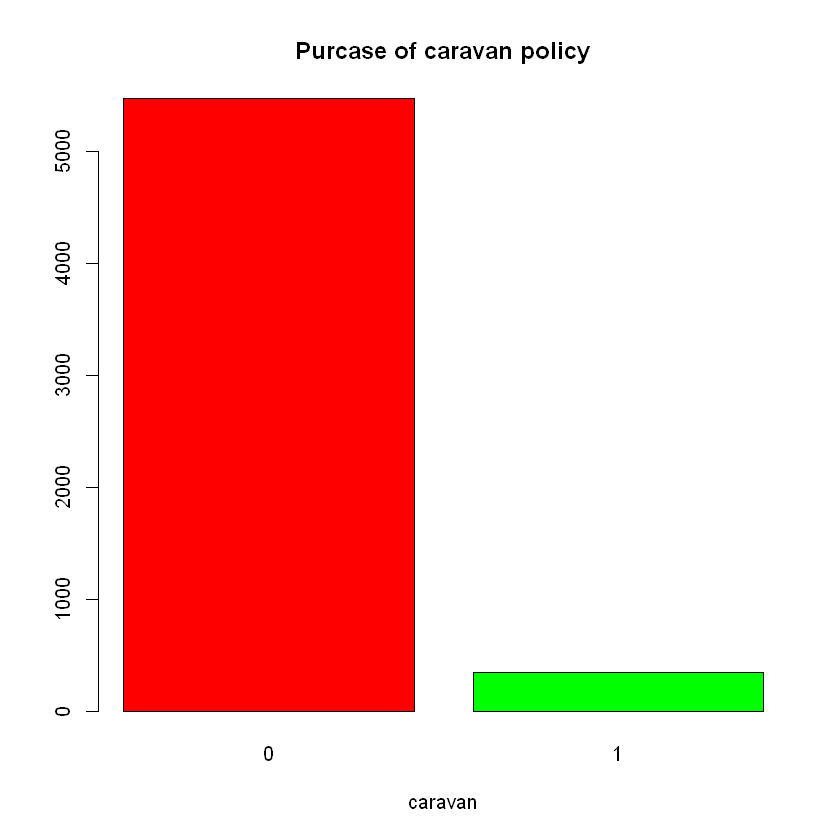

In [1081]:
policy_purchased <- table(train_policy$caravan_policies)

colors=c("red","green")
barplot(policy_purchased, main="Purcase of caravan policy", 
   xlab="caravan", col = colors) 

# Reference3

The above bar graph shows that only 348(green) out of 5822 have actually purchased caravan insuarance policy.

In [1082]:
# Contribution car policies

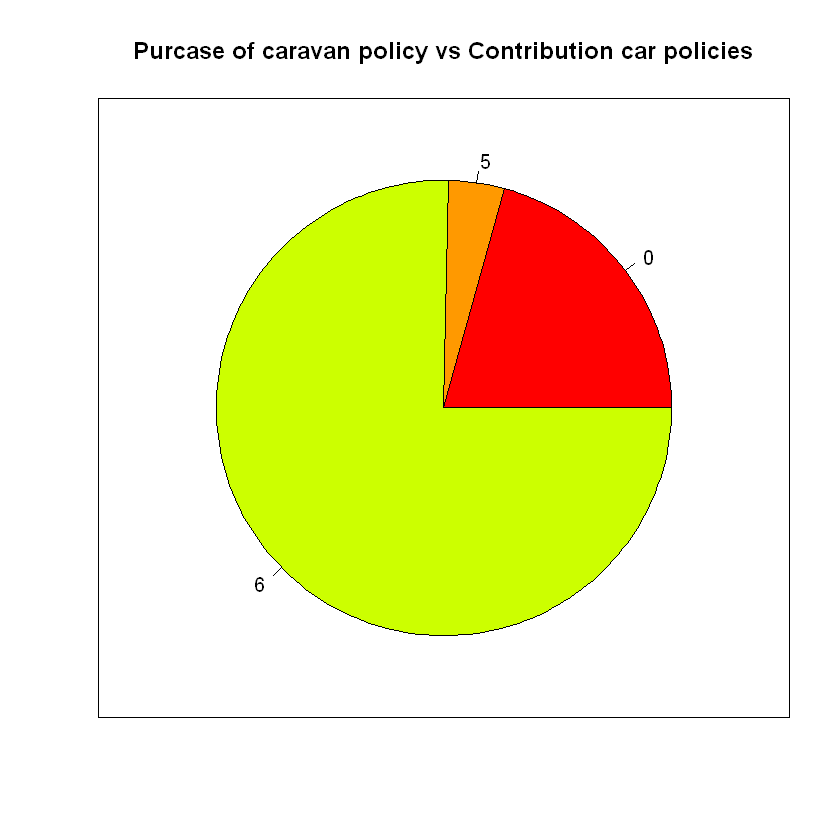

In [1083]:
policy_contcar <- table(train_policy$car_policies[train_policy$caravan_policies == 1])
pie(policy_contcar, main="Purcase of caravan policy vs Contribution car policies" , col = rainbow(10)) 
box()

# Reference4

The graph above shows that label 6 those customers who buy car policies of amount 1000-4999 are more likely to buy caravan policy.

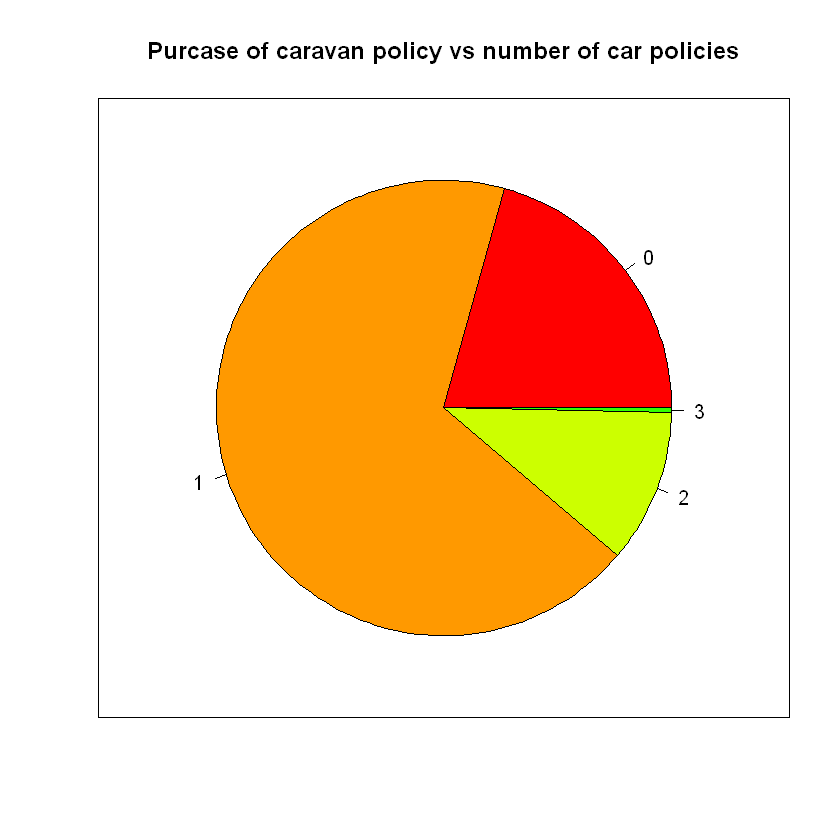

In [1084]:
policy_ncar <- table(train_policy$number_of_car_policies[train_policy$caravan_policies == 1])
pie(policy_ncar, main="Purcase of caravan policy vs number of car policies" , col = rainbow(10)) 
box()

The graph above shows that label 1 those customers who buy 1 car policies are more likely to buy caravan policy.

In [1085]:
# Customer Subtype

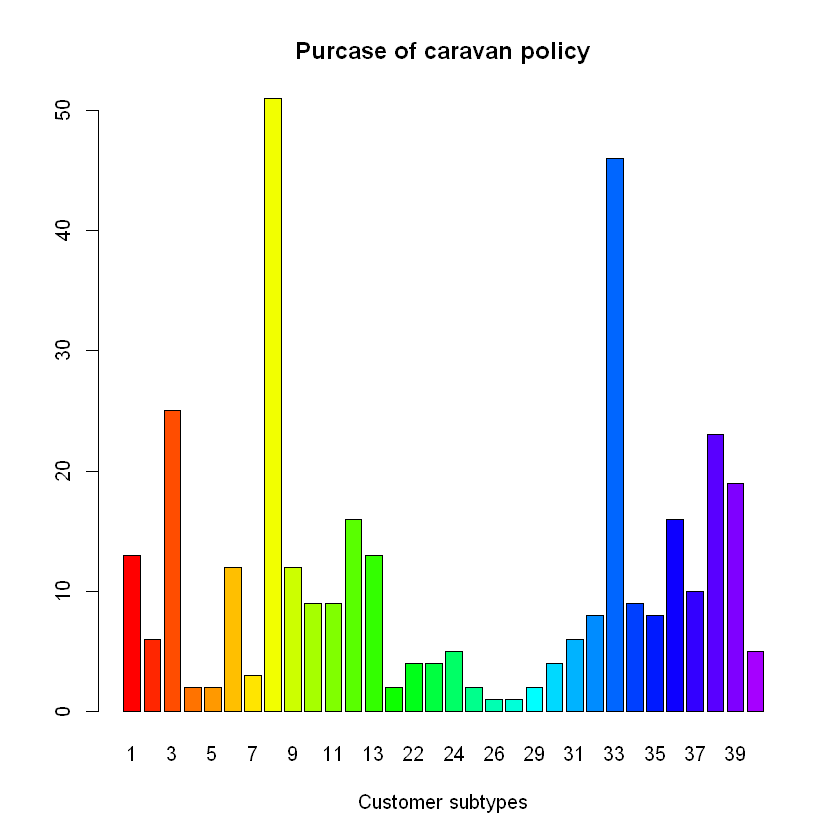

In [1086]:
policy_cust <- table(train_policy$cust_subtype[train_policy$caravan_policies == 1])
#policy_cust
barplot(policy_cust, main="Purcase of caravan policy", 
   xlab="Customer subtypes", col = rainbow(40))


Above graph shows that label 8 - Middle class families are most likely to purchase caravan policy and second highest chances are of label 33 - Lower class large families who will purchase caravan policy.

In [1087]:
#other relation

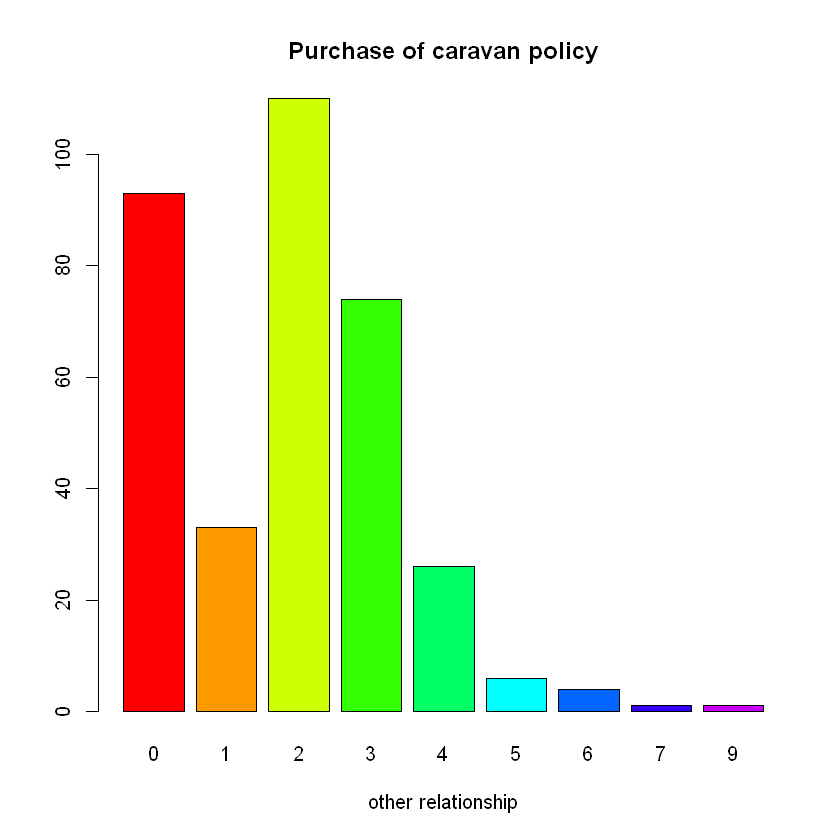

In [1088]:
policy_other <- table(train_policy$other_relation[train_policy$caravan_policies == 1])
#policy_other
barplot(policy_other, main="Purchase of caravan policy", 
   xlab="other relationship", col = rainbow(10))

The above grapgh shows that customer with 2 relationship status are expected to purchase caravan policy rather than other categories relationship status.

In [1089]:
# high level education

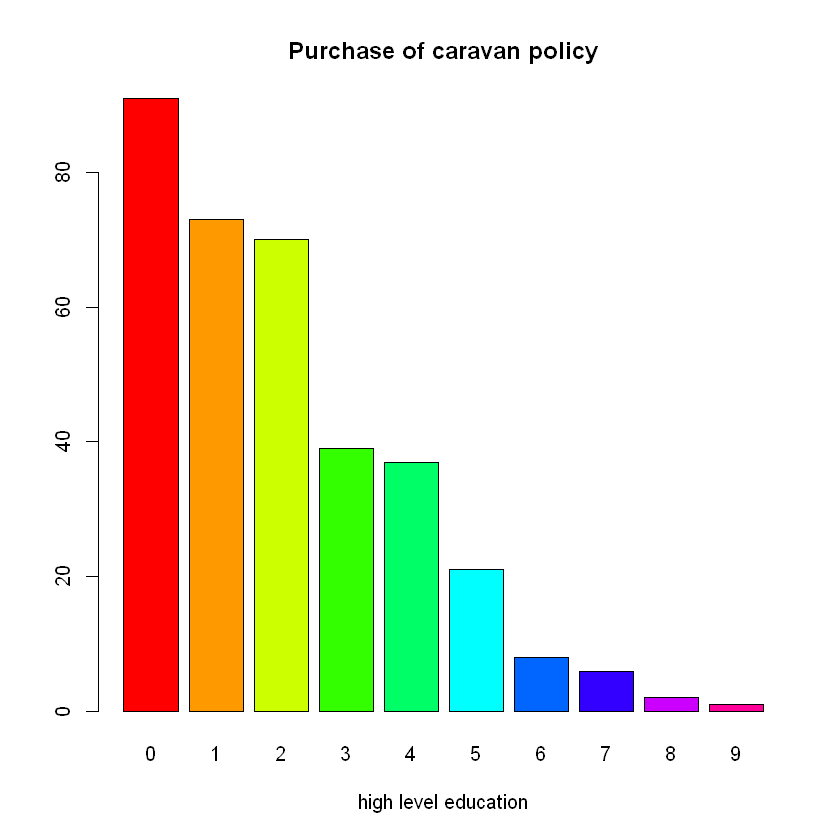

In [1090]:
policy_highlevel <- table(train_policy$high_level_education[train_policy$caravan_policies == 1])
barplot(policy_highlevel, main="Purchase of caravan policy", 
   xlab="high level education" , col = rainbow(10)) 

The above graph shows that label 0 that means those who are not having high level education customers are more likely to purchase caravan policy.

In [1091]:
# Medium level education

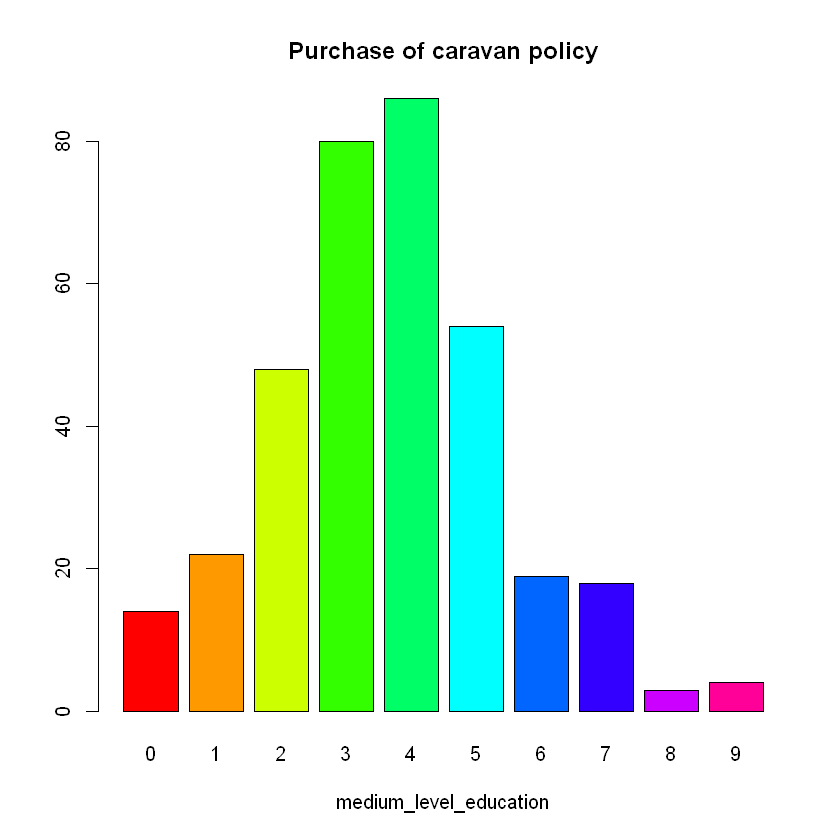

In [1092]:
policy_mediumlevel <- table(train_policy$medium_level_education[train_policy$caravan_policies == 1])
barplot(policy_mediumlevel, main="Purchase of caravan policy", 
   xlab="medium_level_education" , col = rainbow(10)) 

The above grapgh shows that label 4 that means (37-49)% medium level customers are more likely to purchase caravan policy.

In [1093]:
# social class A

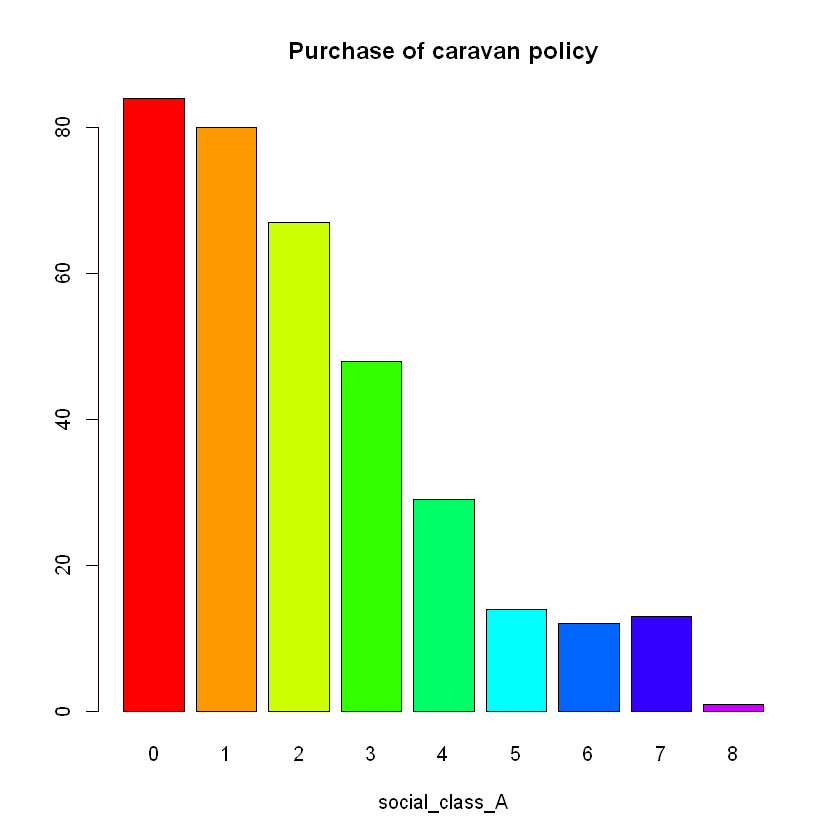

In [1094]:
policy_sclassA <- table(train_policy$social_class_A[train_policy$caravan_policies == 1])
barplot(policy_sclassA, main="Purchase of caravan policy", 
   xlab="social_class_A" , col = rainbow(10)) 

The above grapgh shows that label 0 that means those who are not social class A customers are more likely to purchase carvan policy.

In [1095]:
# 1 car

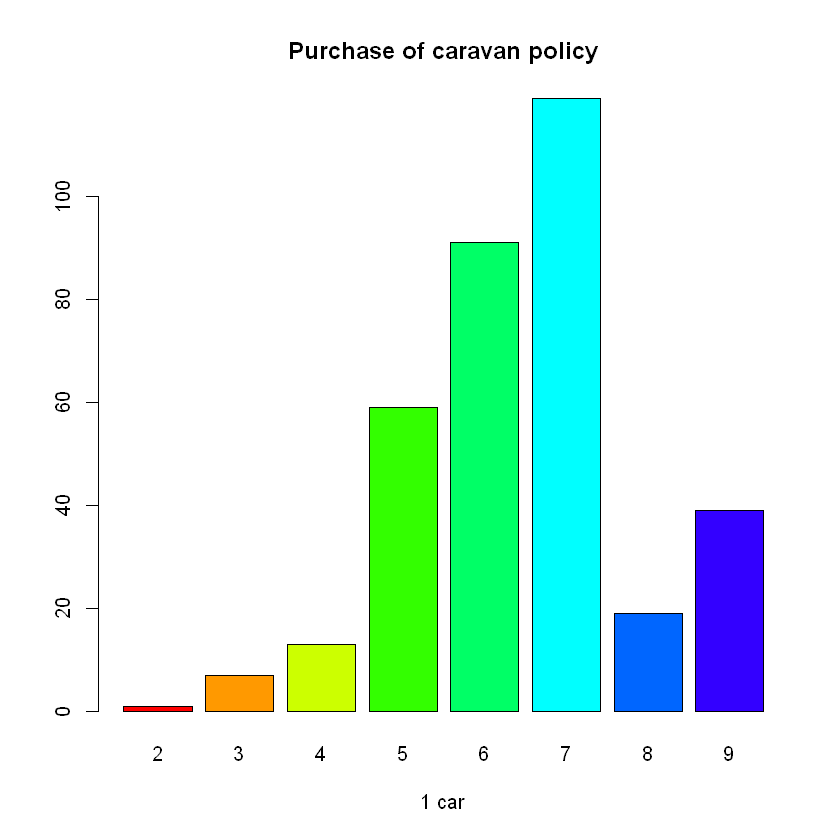

In [1096]:
policy_1car <- table(train_policy$one_car[train_policy$caravan_policies == 1])
barplot(policy_1car, main="Purchase of caravan policy", 
   xlab="1 car" , col = rainbow(10)) 

The above graph shows that label 7 76-88% customers having 1 car are more likely to purchase caravan policy.

In [1097]:
# 2 car

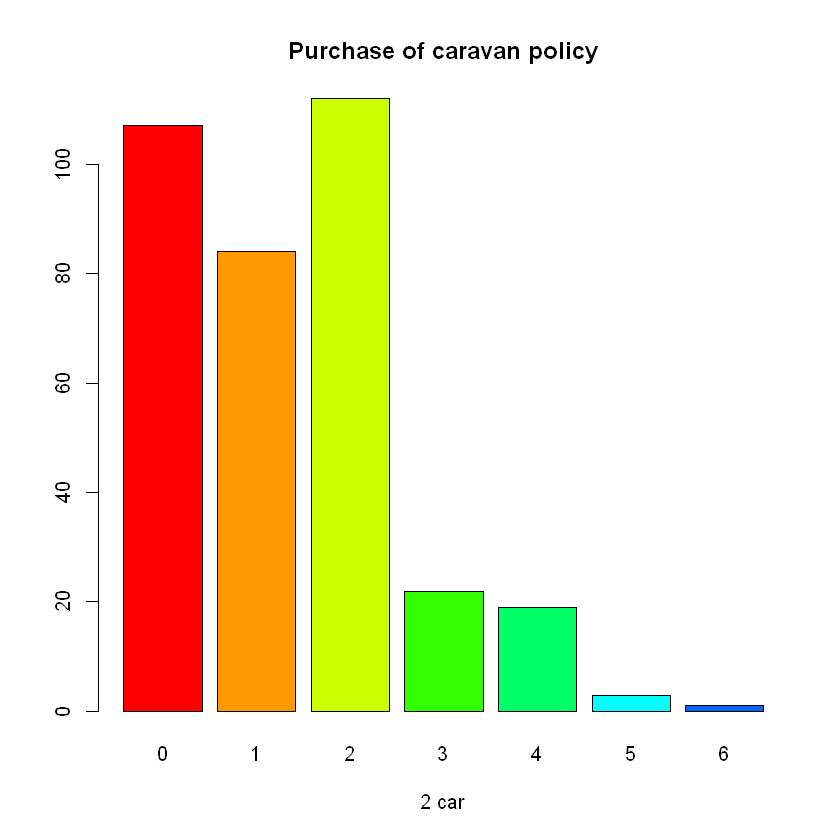

In [1098]:
policy_2car <- table(train_policy$two_car[train_policy$caravan_policies == 1])
barplot(policy_2car, main="Purchase of caravan policy", 
   xlab="2 car" , col = rainbow(10)) 

The above graph shows that label 2- 11-23% customers having 2 car are more likely to purchase caravan policy.

In [1099]:
# no car

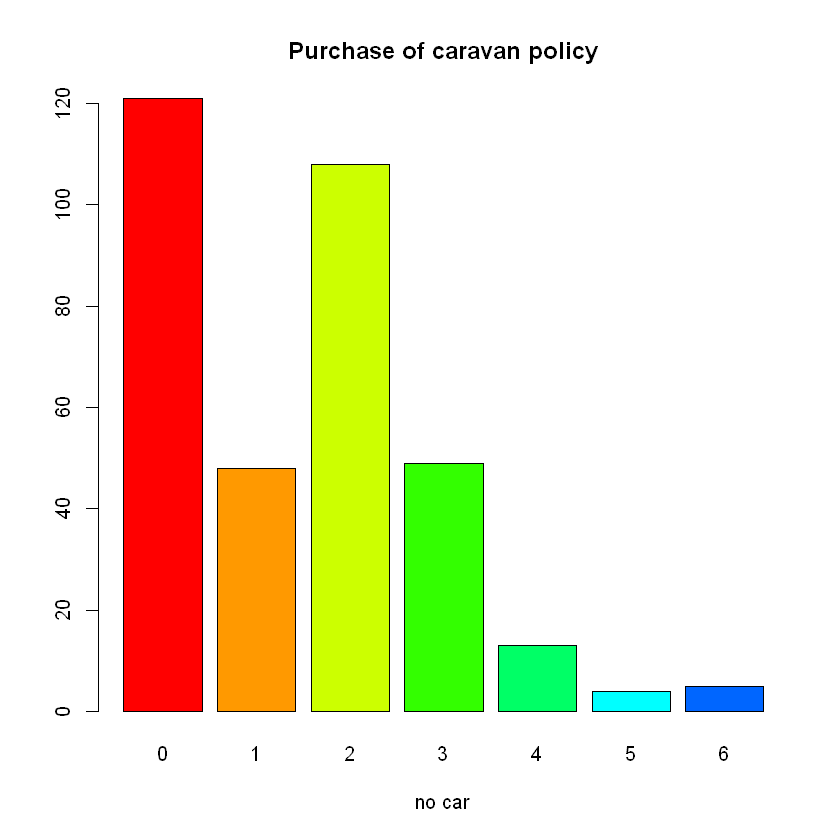

In [1100]:
policy_nocar <- table(train_policy$no_car[train_policy$caravan_policies == 1])
barplot(policy_nocar, main="Purchase of caravan policy", 
   xlab="no car" , col = rainbow(10)) 

The above graph shows that the customers having no car are more likely to purchase caravan policy.

In [1101]:
# avg income

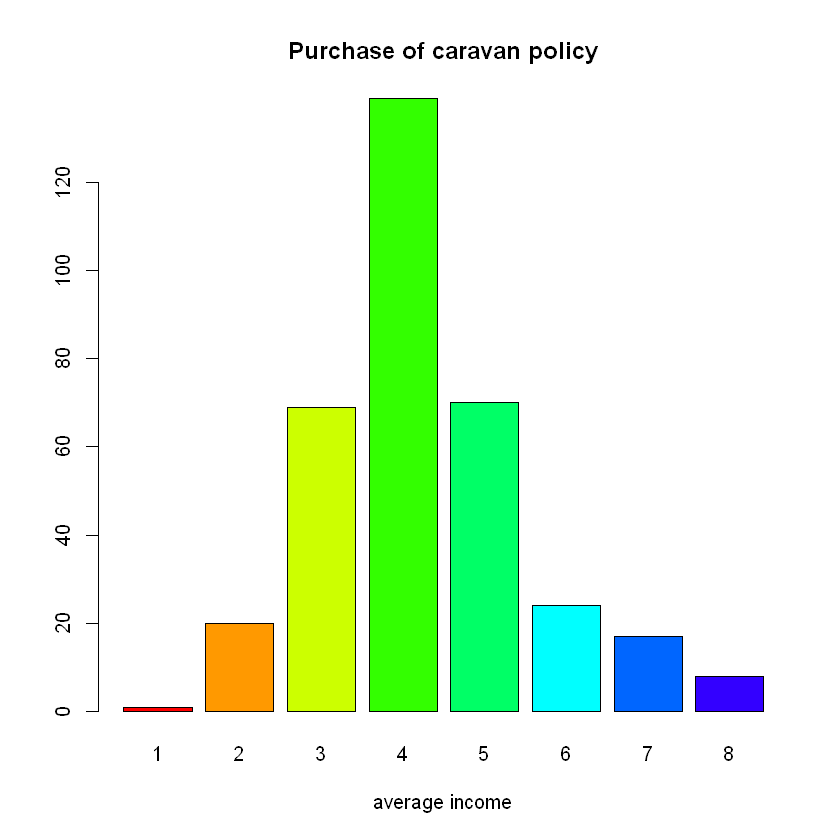

In [1102]:
policy_avgin <- table(train_policy$average_income[train_policy$caravan_policies == 1])
barplot(policy_avgin, main="Purchase of caravan policy", 
   xlab="average income" , col = rainbow(10)) 

The above graph shows that label 4 that means customers having avg income $200-$499 amount are more likely to purchase caravan policy.

In [1103]:
# purchasing power class

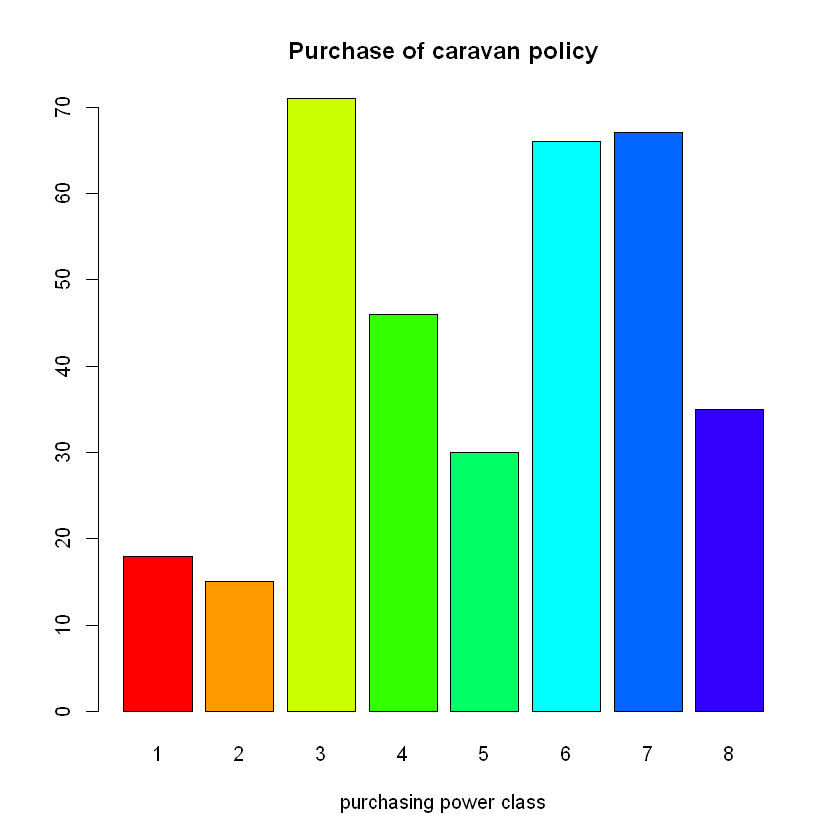

In [1104]:
policy_ppclass <- table(train_policy$purchasing_power_class[train_policy$caravan_policies == 1])
barplot(policy_ppclass, main="Purchase of caravan policy", 
   xlab="purchasing power class" , col = rainbow(10)) 

The above graph shows that label 3- high status senior, label 6- career and childcare and double income no kids customers are more likely to purchase caravan policy.

In [1105]:
#private third party insurance

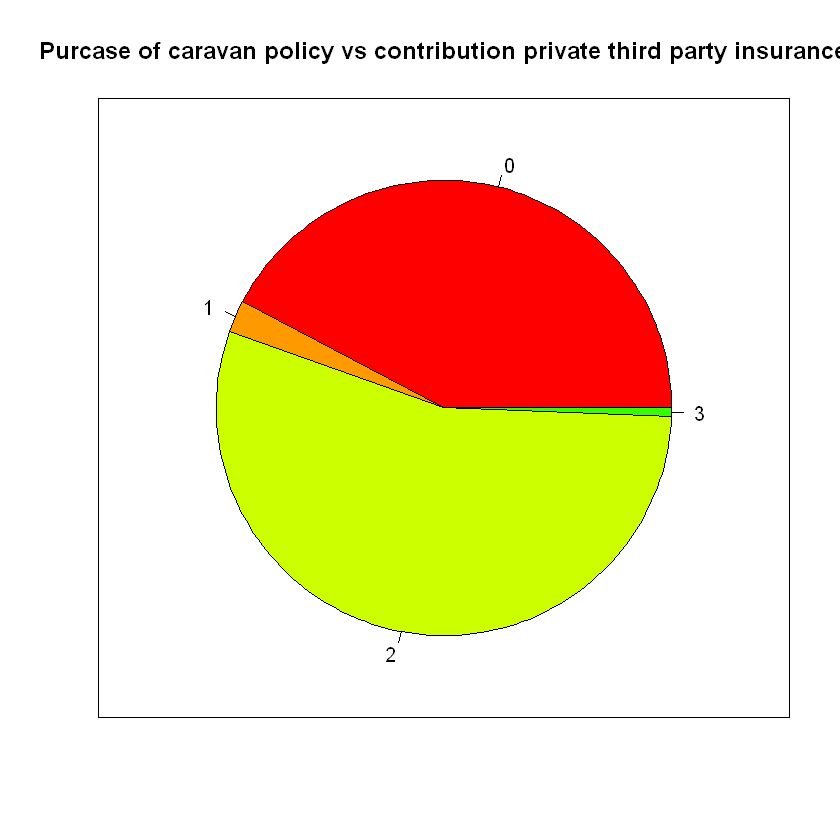

In [1106]:
policy_thirdparty <- table(train_policy$private_third_party_insurance[train_policy$caravan_policies == 1]) 
pie(policy_thirdparty , col = rainbow(10), main="Purcase of caravan policy vs contribution private third party insurance") 
box()



The above graph shows that label 2- customers who buy private third party insurance of 50-99 amount  are more likely to purchase caravan policy.

In [1107]:
# Contribution agricultural insurance polices

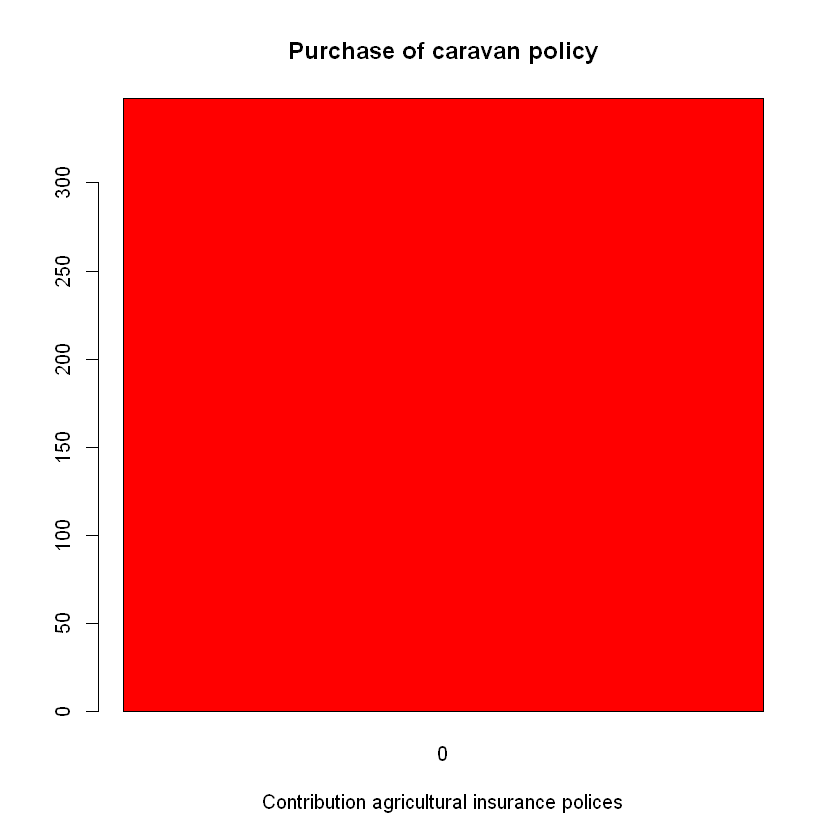

In [1108]:
policy_agrmachine <- table(train_policy$agricultural_machines_policies[train_policy$caravan_policies == 1])
barplot(policy_agrmachine, main="Purchase of caravan policy", 
   xlab="Contribution agricultural insurance polices" , col = rainbow(10))

The above graph shows that none of the customers who have any aggriculture insurance polices will buy caravan policy.

In [1109]:
# Contribution private accident insurance policies

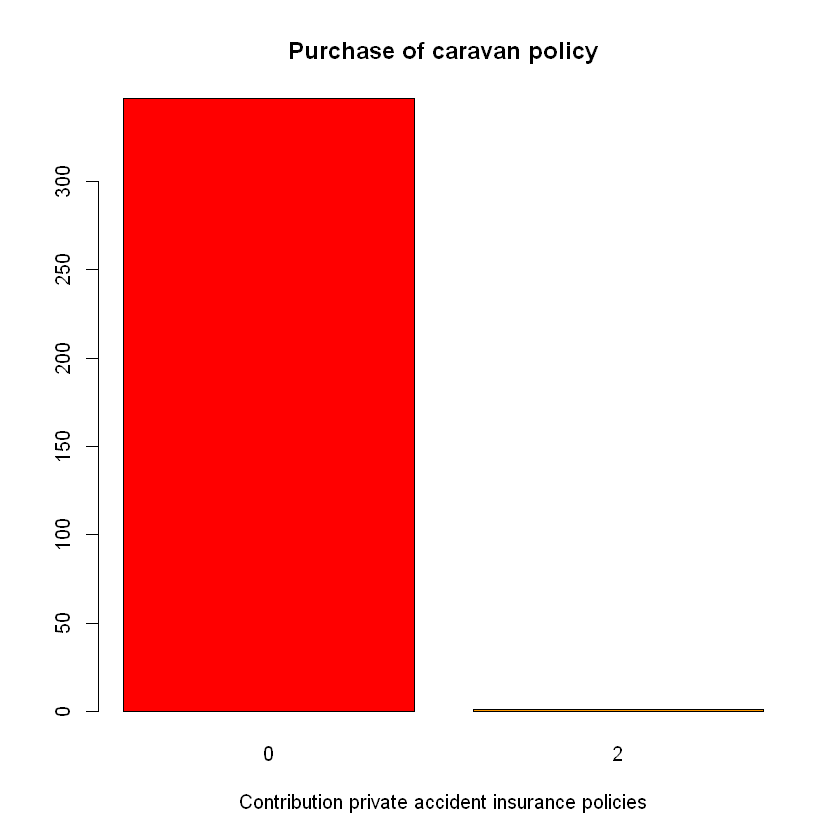

In [1110]:
policy_pvaccident <- table(train_policy$private_accident_insurance_policies[train_policy$caravan_policies == 1])
barplot(policy_pvaccident, main="Purchase of caravan policy", 
   xlab="Contribution private accident insurance policies" , col = rainbow(10))

The above graph shows that none of the customer having private accident insurance polices will buy carvan policy.

In [1111]:
# Contribution social security insurance polices

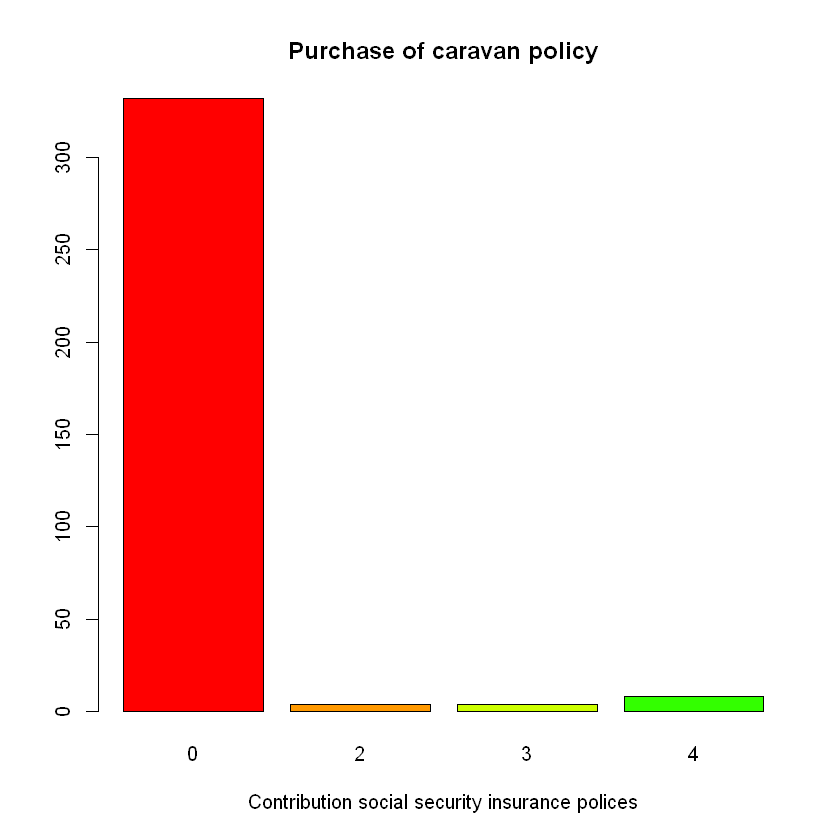

In [1112]:
policy_ssec <- table(train_policy$social_security_insurance_policies[train_policy$caravan_policies == 1])
barplot(policy_ssec, main="Purchase of caravan policy", 
   xlab="Contribution social security insurance polices" , col = rainbow(10))

The above graph shows that donot have any social security insurance polices are more likely to buy carvan policy.

In [1113]:
#Number of third party insurance

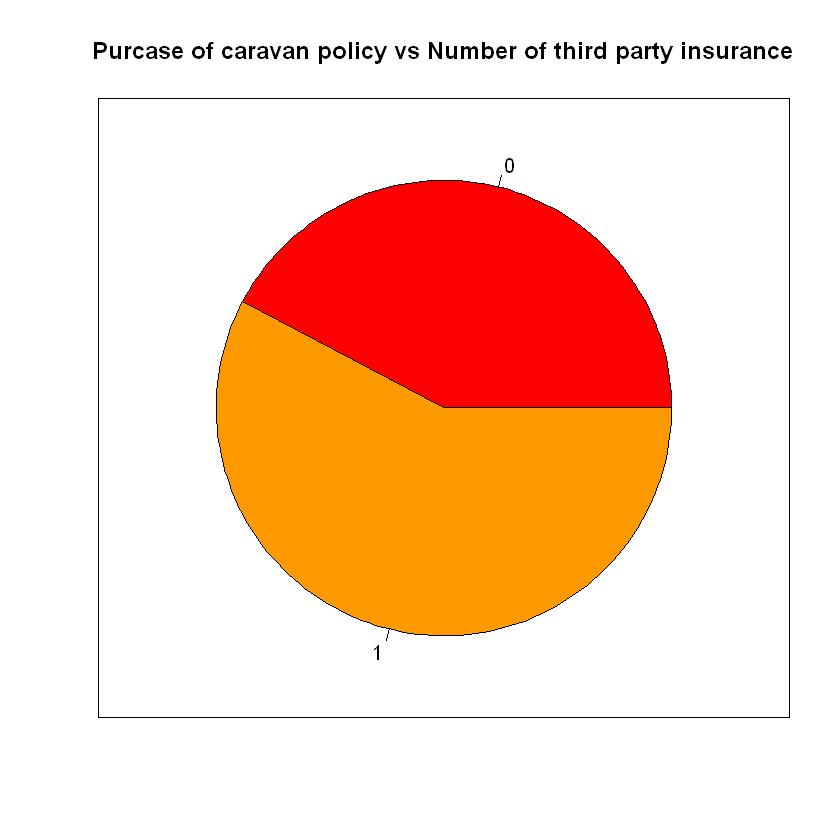

In [1114]:
policy_nthirdparty <- table(train_policy$number_of_private_third_party_insurance[train_policy$caravan_policies == 1])
pie(policy_nthirdparty, col = rainbow(10), main="Purcase of caravan policy vs Number of third party insurance") 
box()

The above graph shows that those customer who have 1 private third party  insurance polices are more likely to buy caravan policy.

In [1115]:
#Number of delivery van polices

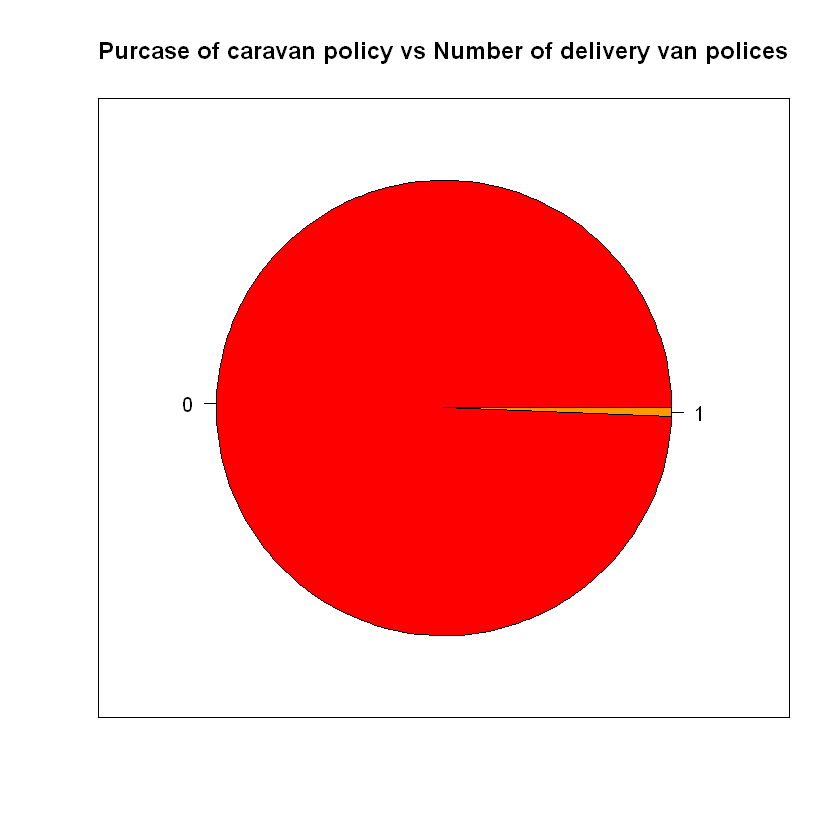

In [1116]:
policy_nvan <- table(train_policy$number_of_delivery_van_policies[train_policy$caravan_policies == 1])
pie(policy_nvan, col = rainbow(10), main="Purcase of caravan policy vs Number of delivery van polices") 
box()

The above graph shows that those customer who have no delivery van policy polices are more likely to buy caravan policy.

In [1117]:
#Number of motorcycle/scooter policies

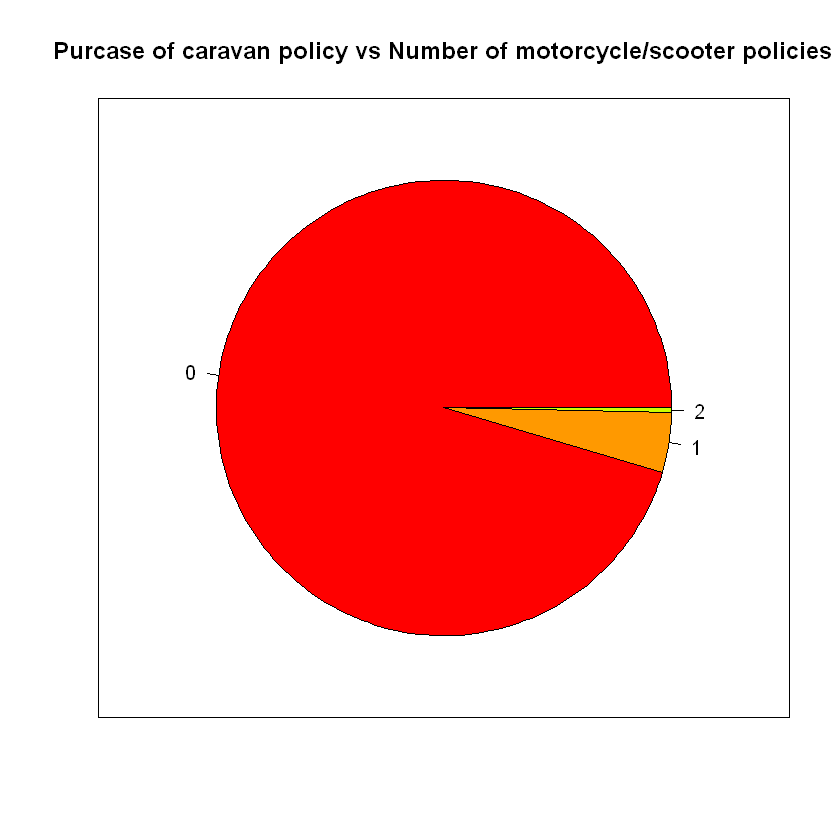

In [1118]:
policy_motor <- table(train_policy$number_of_motorcycle_scooter_policies[train_policy$caravan_policies == 1])
pie(policy_motor, col = rainbow(10), main="Purcase of caravan policy vs Number of motorcycle/scooter policies") 
box()

The above graph shows that those customer who donot have any motorcycle/scooter policies are more likely to buy caravan policy.

In [1119]:
#Number of boat policies

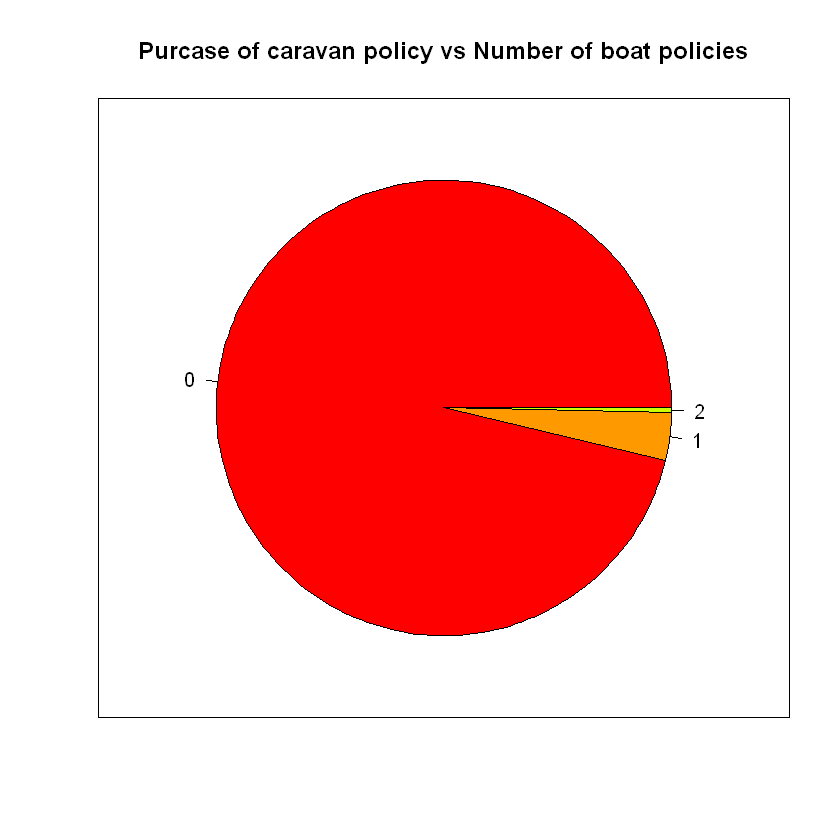

In [1120]:
policy_boat <- table(train_policy$number_of_boat_policies[train_policy$caravan_policies == 1])
pie(policy_boat, col = rainbow(10), main="Purcase of caravan policy vs Number of boat policies") 
box()

The above graph shows that those customer who donot have no any boat policy are more likely to buy carvan policy.

In [1121]:
#Number of bicycle policies

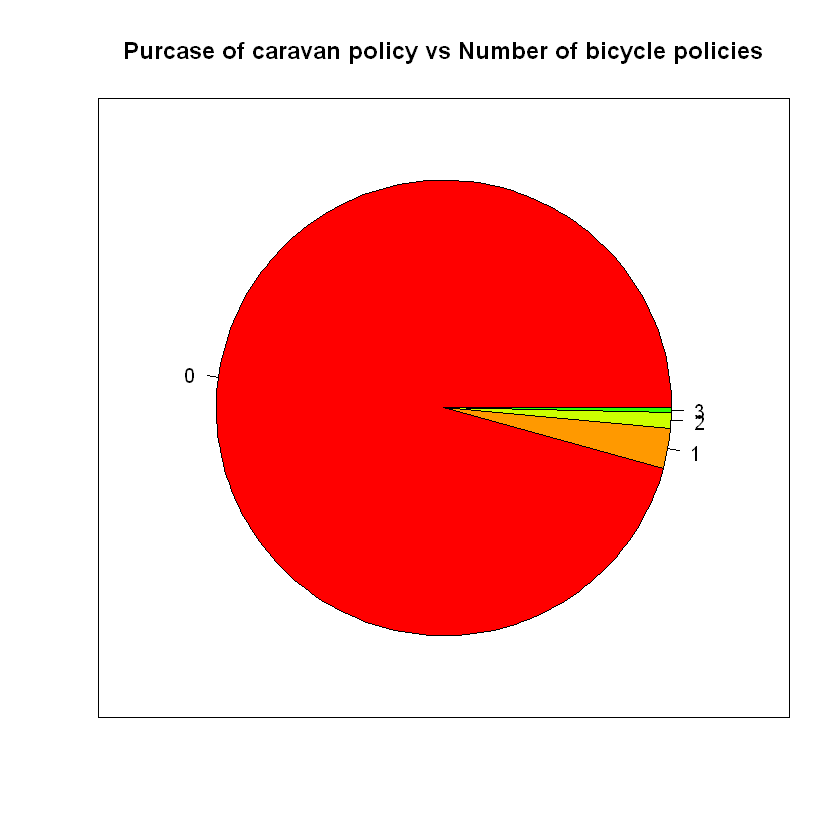

In [1122]:
policy_bicycle <- table(train_policy$number_of_bicycle_policies[train_policy$caravan_policies == 1])
pie(policy_bicycle , col = rainbow(10), main="Purcase of caravan policy vs Number of bicycle policies") 
box()

The above graph shows that those customer who dont have any bicycle polices are more likely to buy carvan policy.

In [1123]:
# Avg age

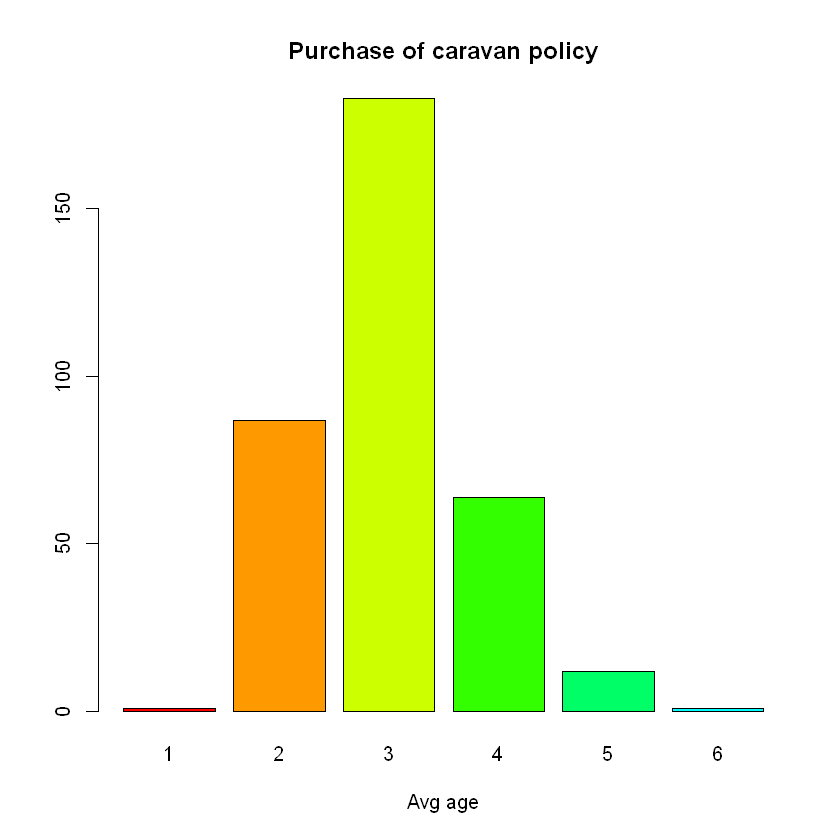

In [1124]:
policy_avgage <- table(train_policy$avg_age[train_policy$caravan_policies == 1])
barplot(policy_avgage, main="Purchase of caravan policy", 
   xlab="Avg age" , col = rainbow(10))


The above graph shows that those customers who are in age between 40-50 years are more likely to buy caravan policy.

In [1125]:
# number of fire policies

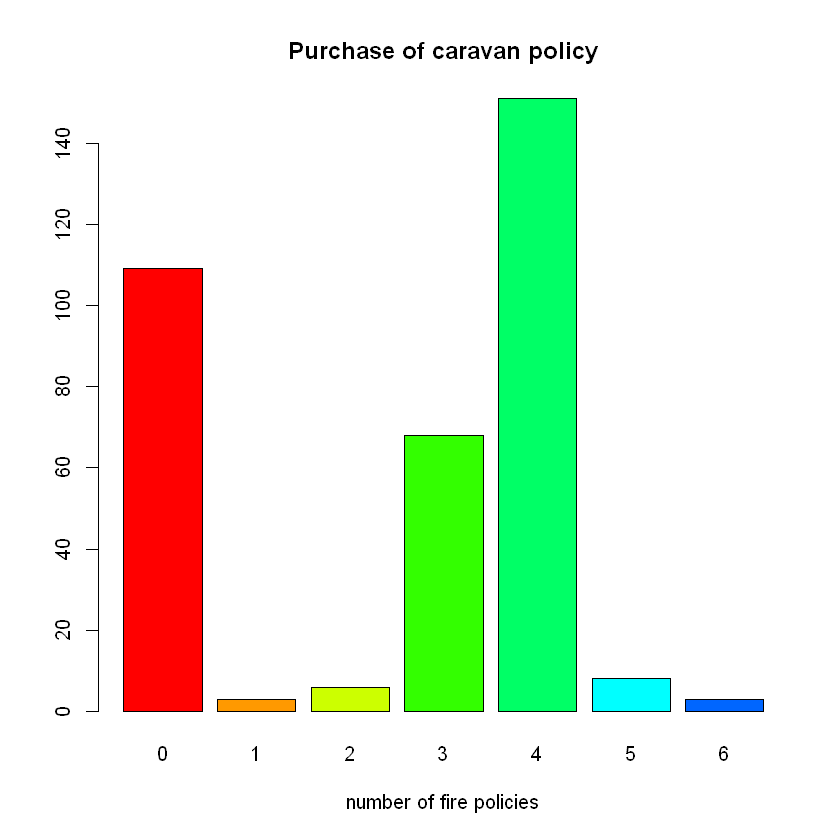

In [1126]:
policy_fire <- table(train_policy$fire_policies[train_policy$caravan_policies == 1])
barplot(policy_fire, main="Purchase of caravan policy", 
   xlab="number of fire policies" , col = rainbow(10))

The above graph shows that those customers who 4 fire policies are more likely to buy caravan policy.

In [1127]:
# Customer main type

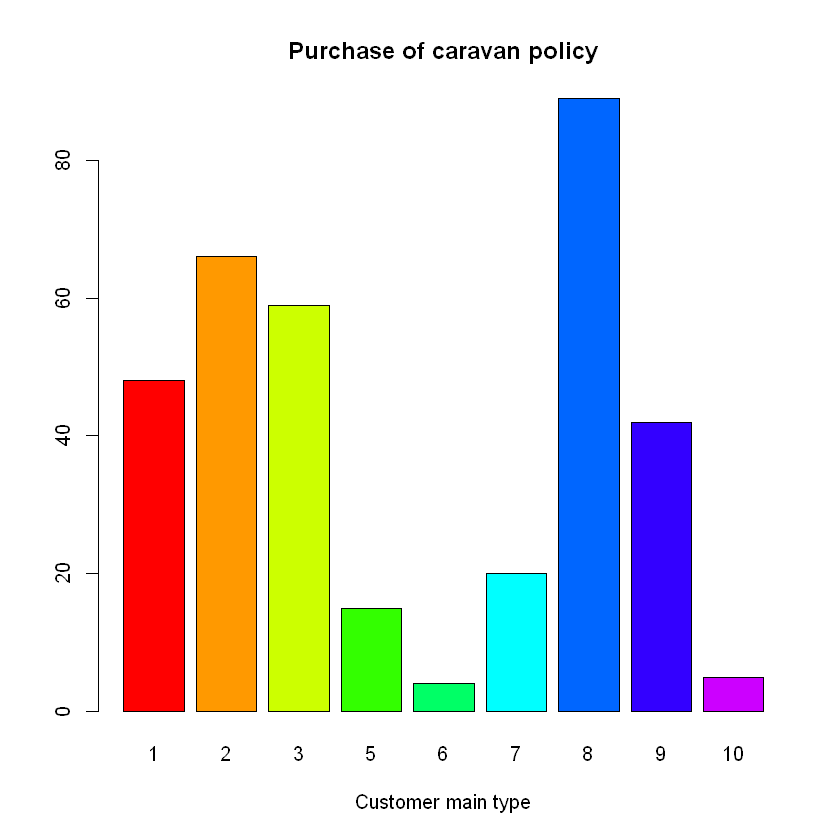

In [1128]:
policy_mtype <- table(train_policy$cust_main_type[train_policy$caravan_policies == 1])
barplot(policy_mtype, main="Purchase of caravan policy", 
   xlab="Customer main type" , col = rainbow(10))


The above graph shows that those customers who have family with grown ups are  more likely to buy caravan policy.

## 3. Model Development<a class="anchor" id="sec_3"></a>

We know that in Machine learning we mostly have noise in our data. In order to select the best features for our model and if the number of features is very large. It's important to use some algorithm to find significant features.

Some important reasons are:
Reduces overfitting.
Increases accuracy of a model.
Reduces complexity.
Easier to interpret.
Improve algorithm to train faster.

* Reference5

For selecting features from a large number of predictors we use subset selection, stepwise selection or shrinkage methods.

For feature selection for our dataset I have used stepwise selection(foward and backward) and shrinkage method(lasso and ridge Regression).

Backward selection - 

Recursive Feature selection Elimination eliminates features in the opposite direction. It's completely opposite to forward feature selection.

One drawback of backward stepwise selection is it does not run on all the combination of features. Its orders of magnitude are computationally less intensive than subset selection.

This selection starts will the whole set of predictors and remove one less significant predictor at a time and finally select a model. 

# Perform backward stepwise selection

Performing backward stepwise selection method on training data in order to find subset of features which can be used to identify  statisfactory model.

In [1129]:
library(leaps)
fit_bwd <- regsubsets(caravan_policies ~ ., data = train_policy , nvmax = 85, method = "backward")
fit.summary_bwd <- summary(fit_bwd)
fit.summary_bwd

Subset selection object
Call: regsubsets.formula(caravan_policies ~ ., data = train_policy, 
    nvmax = 85, method = "backward")
85 Variables  (and intercept)
                                                Forced in Forced out
cust_subtype                                        FALSE      FALSE
number_of_houses                                    FALSE      FALSE
avg_size_household                                  FALSE      FALSE
avg_age                                             FALSE      FALSE
cust_main_type                                      FALSE      FALSE
roman_catholic                                      FALSE      FALSE
protestant                                          FALSE      FALSE
other_religion                                      FALSE      FALSE
no_religion                                         FALSE      FALSE
married                                             FALSE      FALSE
living_together                                     FALSE      FALSE
other_relati

The asterisk sign signifies the feature in a column is included in the model. In the above backward subset selection summary it shows that for best one variable model car_policies and for best two variable model car_policies and the number of boat policies and so on and after k models all the significant predictors are selected for the best model.

We are finding  different number of predictors using  $C_p$, BIC and adjusted-$R^2$ and will get the score, to plot them  in order to identify a satisfactory model.

[1] 29

[1] 8

[1] 1

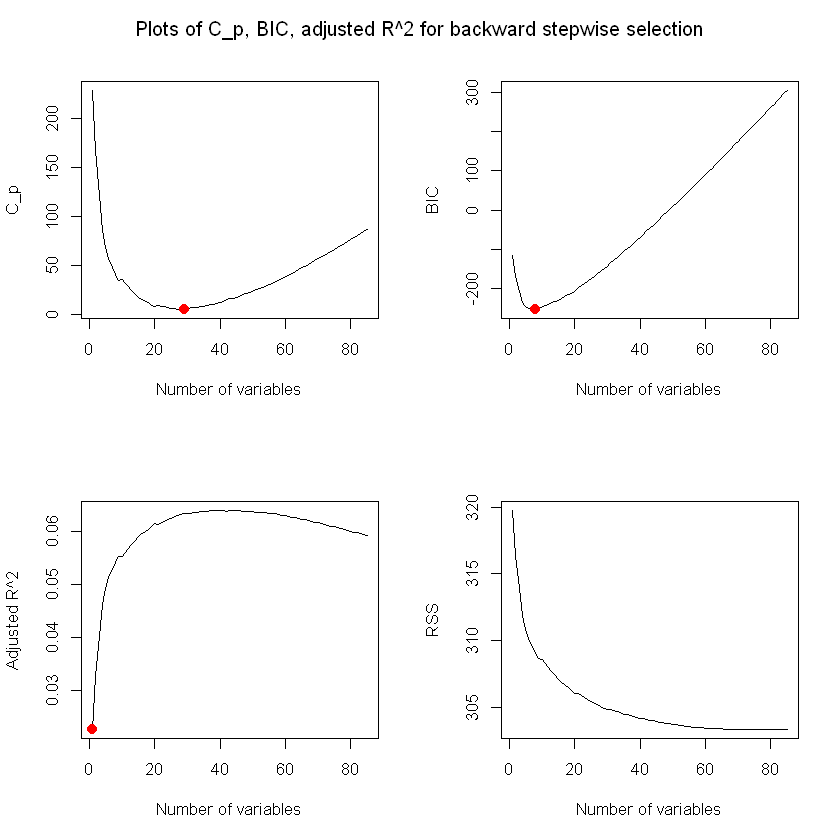

In [1130]:
par(mfrow = c(2, 2))
plot(fit.summary_bwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
mincp = which.min(fit.summary_bwd$cp)
points(mincp, fit.summary_bwd$cp[mincp], col = "red", cex = 2, pch = 20)

plot(fit.summary_bwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
minbic = which.min(fit.summary_bwd$bic)
points(minbic, fit.summary_bwd$bic[minbic], col = "red", cex = 2, pch = 20)

plot(fit.summary_bwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
minadjr2 = which.min(fit.summary_bwd$adjr2)
points(minadjr2, fit.summary_bwd$adjr2[minadjr2], col = "red", cex = 2, pch = 20)

plot(fit.summary_bwd$rss, xlab = "Number of variables", ylab = "RSS", type = "l")


mtext("Plots of C_p, BIC, adjusted R^2 for backward stepwise selection", side = 3, line = -2, outer = TRUE)

mincp
minbic
minadjr2


$C_p$, BIC and adjusted-$R^2$ predict 29, 8 and 1 number of features respectively which can be further investigate to find significant number of features.

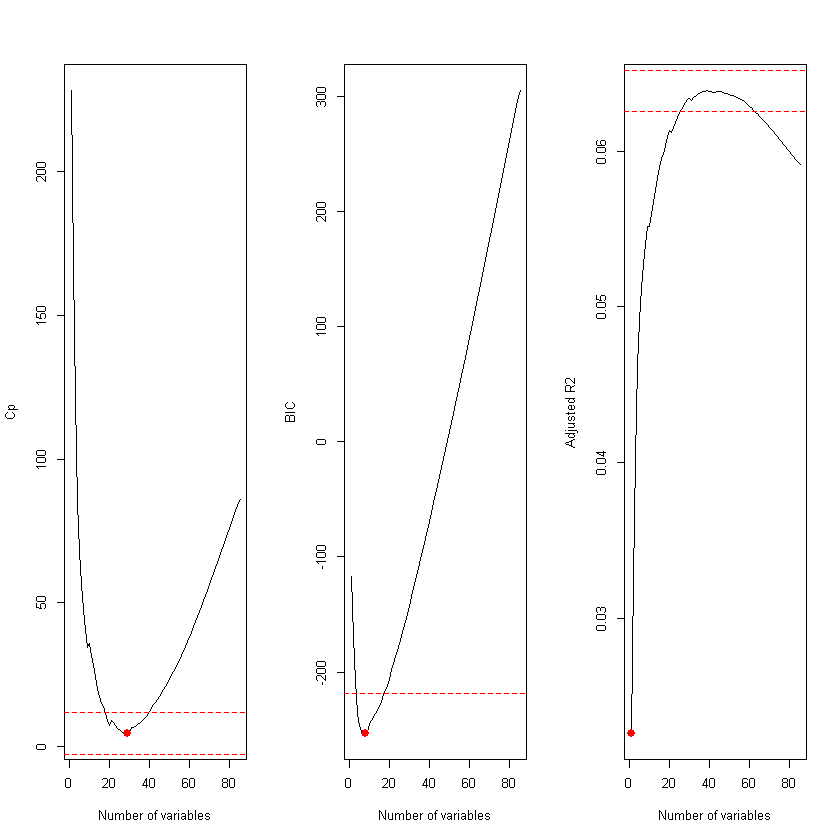

In [1131]:
par(mfrow = c(1, 3))
plot(fit.summary_bwd$cp, xlab = "Number of variables", ylab = "Cp", type = "l")
min.cp <- min(fit.summary_bwd$cp)
std.cp <- sd(fit.summary_bwd$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
mincp = which.min(fit.summary_bwd$cp)
points(mincp, fit.summary_bwd$cp[mincp], col = "red", cex = 2, pch = 20)

plot(fit.summary_bwd$bic, xlab = "Number of variables", ylab = "BIC", type='l')
min.bic <- min(fit.summary_bwd$bic)
std.bic <- sd(fit.summary_bwd$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
minbic = which.min(fit.summary_bwd$bic)
points(minbic, fit.summary_bwd$bic[minbic], col = "red", cex = 2, pch = 20)


plot(fit.summary_bwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R2", type = "l")
max.adjr2 <- max(fit.summary_bwd$adjr2)
std.adjr2 <- sd(fit.summary_bwd$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "red", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "red", lty = 2)
minadjr2 = which.min(fit.summary_bwd$adjr2)
points(minadjr2, fit.summary_bwd$adjr2[minadjr2], col = "red", cex = 2, pch = 20)

$C_p$, BIC and adjusted-$R^2$ show that size 8 is the minimum size for the subset for which the scores are within 0.2 standard deviations of optimum. We pick 8 as the best subset size and find best 8 variables using entire data.

In [1132]:
coeffs <- coef(fit_bwd, id = 8)
names(coeffs)

[1] "(Intercept)"                                 
[2] "married"                                     
[3] "lower_level_education"                       
[4] "farmer"                                      
[5] "third_party_insurance_agriculture"           
[6] "car_policies"                                
[7] "fire_policies"                               
[8] "number_of_boat_policies"                     
[9] "number_of_social_security_insurance_policies"

Above is the list of features we selected using backward stepwise selection. But I am not going to use these features in a model due to its limitation that Backward selection requires that the number of samples n is larger than
the number of variables p(number of predictors) (so that the full model can be fit). In contrast, forward stepwise can be used even when n < p, and so is the only viable subset method when p is very large.

# Perform forward stepwise selection

Forward selection starts with adding one predictor one at a time in null model and choose the best model with best predictors on the basis of RSS, CV and adjusted R square. In each repeatation, it keeps on adding next predictor keeping all the previous predictors selected in all the previous iterations.

A drawback of this model is once a predictor is selected in a model can never be drop. But can be minimised, if filtering is performed before forward stepwise feature selection. It works to the fullest and provides the best model. Thus in filtration least correlated features are already dropped.

In [1133]:
fit_fwd <- regsubsets(caravan_policies ~ ., data = train_policy , nvmax = 85, method = "forward")
fit.summary_fwd <- summary(fit_fwd)
fit.summary_fwd

Subset selection object
Call: regsubsets.formula(caravan_policies ~ ., data = train_policy, 
    nvmax = 85, method = "forward")
85 Variables  (and intercept)
                                                Forced in Forced out
cust_subtype                                        FALSE      FALSE
number_of_houses                                    FALSE      FALSE
avg_size_household                                  FALSE      FALSE
avg_age                                             FALSE      FALSE
cust_main_type                                      FALSE      FALSE
roman_catholic                                      FALSE      FALSE
protestant                                          FALSE      FALSE
other_religion                                      FALSE      FALSE
no_religion                                         FALSE      FALSE
married                                             FALSE      FALSE
living_together                                     FALSE      FALSE
other_relatio

The asterisk sign signifies the feature in a column is included in the model. In the above forward subset selection summary it shows that for best one variable model car_policies and for best two variable model car_policies and the number of boat policies and so on and after k models all the significant predictors are selected for the best model.

[1] 23

[1] 8

[1] 1

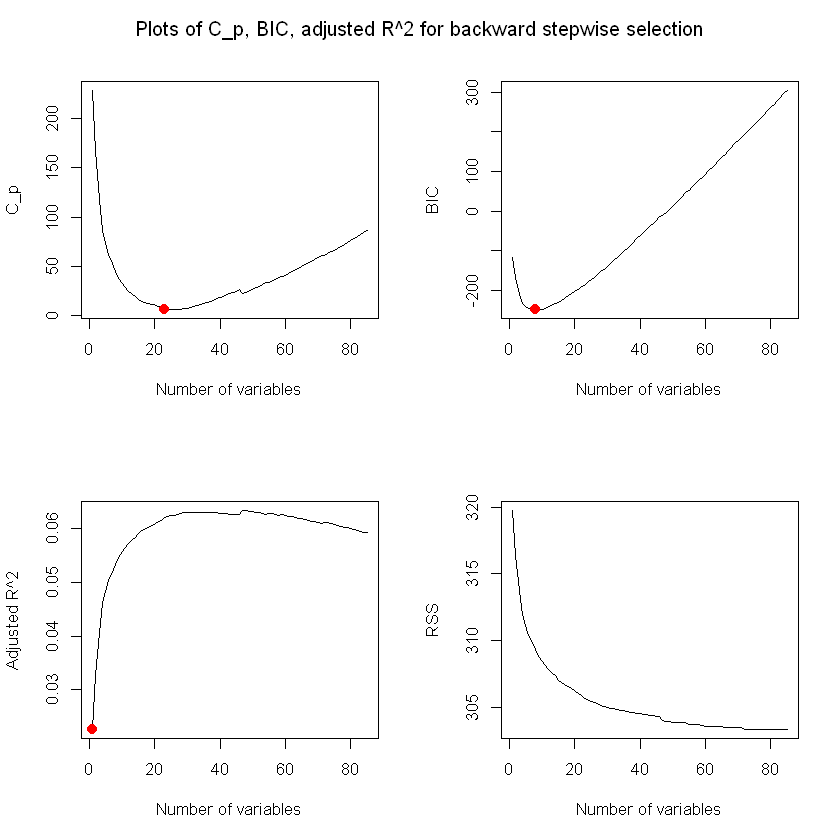

In [1134]:
par(mfrow = c(2, 2))
plot(fit.summary_fwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
mincp = which.min(fit.summary_fwd$cp)
points(mincp, fit.summary_fwd$cp[mincp], col = "red", cex = 2, pch = 20)

plot(fit.summary_fwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
minbic = which.min(fit.summary_fwd$bic)
points(minbic, fit.summary_fwd$bic[minbic], col = "red", cex = 2, pch = 20)

plot(fit.summary_fwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
minadjr2 = which.min(fit.summary_fwd$adjr2)
points(minadjr2, fit.summary_fwd$adjr2[minadjr2], col = "red", cex = 2, pch = 20)

plot(fit.summary_fwd$rss, xlab = "Number of variables", ylab = "RSS", type = "l")


mtext("Plots of C_p, BIC, adjusted R^2 for backward stepwise selection", side = 3, line = -2, outer = TRUE)

mincp
minbic
minadjr2


We are finding  different number of predictors using  $C_p$, BIC and adjusted-$R^2$ and will get the score, to plot them  in order to identify a satisfactory model.

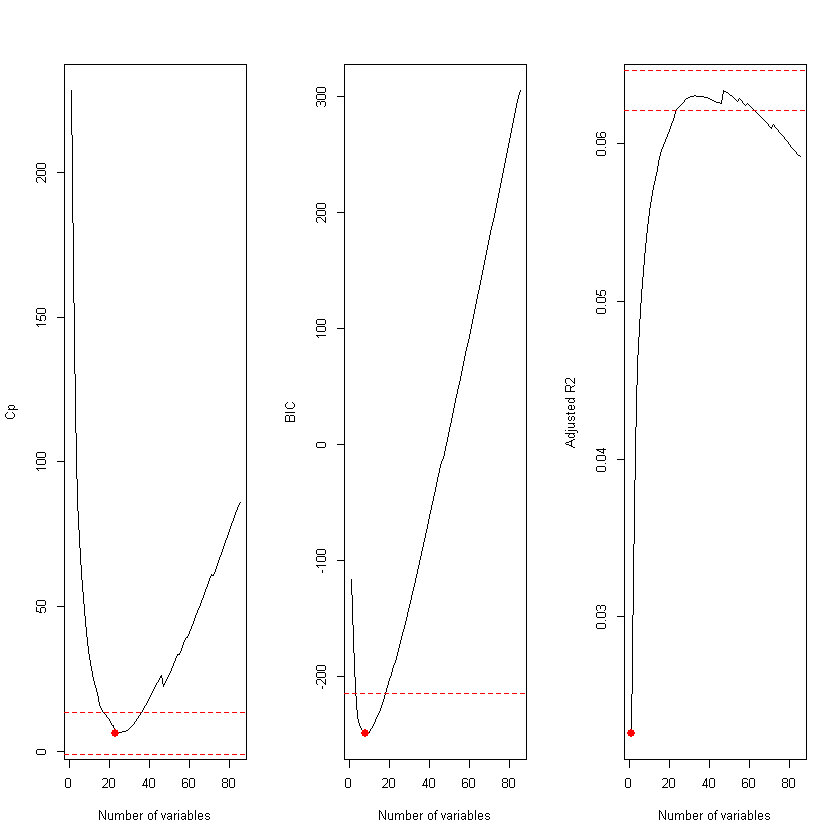

In [1135]:
par(mfrow = c(1, 3))
plot(fit.summary_fwd$cp, xlab = "Number of variables", ylab = "Cp", type = "l")
min.cp <- min(fit.summary_fwd$cp)
std.cp <- sd(fit.summary_fwd$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
mincp = which.min(fit.summary_fwd$cp)
points(mincp, fit.summary_fwd$cp[mincp], col = "red", cex = 2, pch = 20)

plot(fit.summary_fwd$bic, xlab = "Number of variables", ylab = "BIC", type='l')
min.bic <- min(fit.summary_fwd$bic)
std.bic <- sd(fit.summary_fwd$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
minbic = which.min(fit.summary_fwd$bic)
points(minbic, fit.summary_fwd$bic[minbic], col = "red", cex = 2, pch = 20)


plot(fit.summary_fwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R2", type = "l")
max.adjr2 <- max(fit.summary_fwd$adjr2)
std.adjr2 <- sd(fit.summary_fwd$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "red", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "red", lty = 2)
minadjr2 = which.min(fit.summary_fwd$adjr2)
points(minadjr2, fit.summary_fwd$adjr2[minadjr2], col = "red", cex = 2, pch = 20)

$C_p$, BIC and adjusted-$R^2$ show that size 8 is the minimum size for the subset for which the scores are within 0.2 standard deviations of optimum. We pick 8 as the best subset size and find best 8 variables using entire data.

In [1136]:
coeffs <- coef(fit_fwd, id = 8)
names(coeffs)

[1] "(Intercept)"                                 
[2] "married"                                     
[3] "lower_level_education"                       
[4] "purchasing_power_class"                      
[5] "private_third_party_insurance"               
[6] "car_policies"                                
[7] "fire_policies"                               
[8] "number_of_boat_policies"                     
[9] "number_of_social_security_insurance_policies"

Thus the estimated coefficients for forward stepwise selection are married, lower_level_education, purchasing_power_class, private_third_party_insurance, car_policies, fire_policies, number_of_boat_policies, number_of_social_security_insurance_policies' and are considered for creating logistic model.

To compare these variables with the EDA performed the car_policies have highest correlation with target variable which is also selected in our feature selection method. Lets check for other variables as well purchasing_power_class, fire_policies, number_of_boat_policies, private_third_party_insurance shows a great significance with caravan variable which are shown by EDA analysis as well. 

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

# Perform Logistic model for forward selection

The target variable(carvan policy) is a categorical variable while the predictors can be continuous, categorical or a mix of both. Here I am building model “binomial logistic regression”, since the variable to predict is binary(0 or 1)

* Reference6


Logistic model is fitted with features selected by forward stepwise selection.

In [1137]:
logistic_model_f <- glm(caravan_policies ~ married + lower_level_education + purchasing_power_class + 
                        private_third_party_insurance + car_policies + fire_policies + number_of_boat_policies + 
                        number_of_social_security_insurance_policies,
                        data = train_policy, family = "binomial") # logistic fitting
summary(logistic_model_f)


Call:
glm(formula = caravan_policies ~ married + lower_level_education + 
    purchasing_power_class + private_third_party_insurance + 
    car_policies + fire_policies + number_of_boat_policies + 
    number_of_social_security_insurance_policies, family = "binomial", 
    data = train_policy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5175  -0.3859  -0.2651  -0.1839   3.1917  

Coefficients:
                                             Estimate Std. Error z value
(Intercept)                                  -4.73853    0.32501 -14.580
married                                       0.11792    0.03442   3.426
lower_level_education                        -0.11232    0.02881  -3.898
purchasing_power_class                        0.08382    0.03389   2.473
private_third_party_insurance                 0.19467    0.06817   2.856
car_policies                                  0.22446    0.02387   9.403
fire_policies                                 0.10129    0.03536

The summary explains a lot of different features of our logistic model.
* Deviance Residuals shows the measure of our model fit consisting of (minimum, maximum, quantile 1 and 3 ) shows the distribution of the deviance residuals for individual cases used in the model.
* Z- value gives variables are significant or not and it also indicates that the corresponding true regression coefficient is not 0.
* Null deviance 2635.5 shows how well the response variable is predicted by a model that includes only the intercept.
* Residual deviance 2350.4 indicates how well the response variable is predicted with your model
* AIC 2368.4 provides a method for assessing the quality of your model through comparison of related models and estimates the relative information lost by a given model: the less information a model loses, the higher the quality of that model.
* For our model Fisher’s Scoring Algorithm needed six iterations to perform the fit which shows model had no trouble doing it.

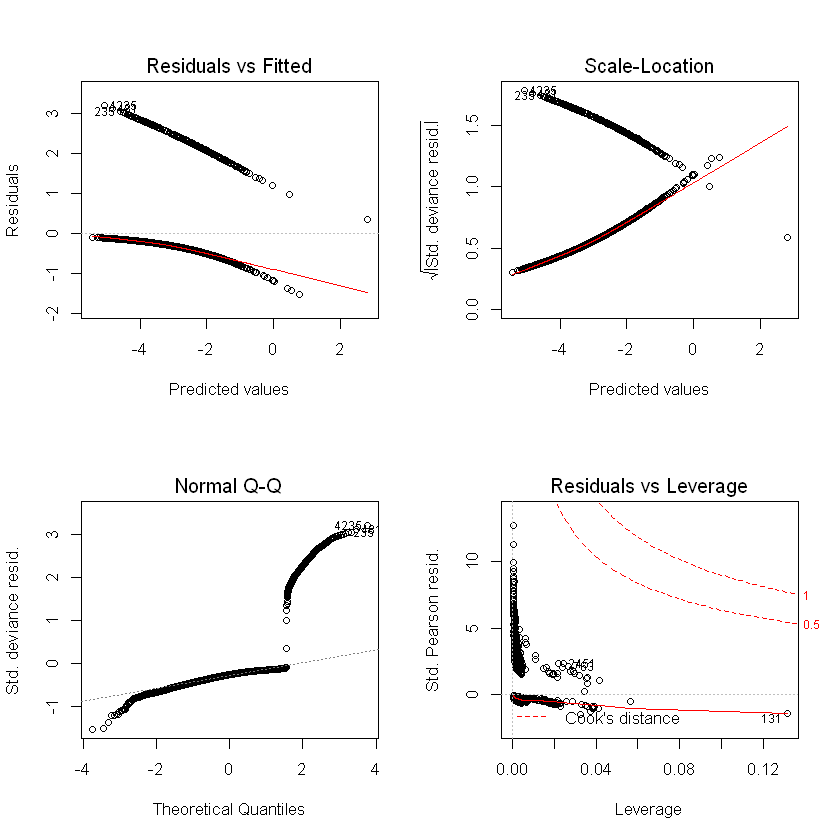

In [1138]:
par(mfcol=c(2,2))
plot(logistic_model_f)

The above 4 plots represent:

The residual vs fitted plot: The plot shows that residuals are not scattered evenly around horizontal line that means  predictors are response variable have non-linear relationship.

The Q-Q plot here shows that are not normally distributed thus its not scatteredplot. Usually its prefer that residuals to be in a linear line.

The scale location plot shows that residuals are randomly spread.

The residual-leverage plot helps to understand if there is any outlier in our data using cook's distance

In [1139]:
anova(logistic_model_f, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,5821,2635.540,NA
married,1,30.780213,5820,2604.760,2.889694e-08
lower_level_education,1,39.989131,5819,2564.771,2.553799e-10
purchasing_power_class,1,9.639752,5818,2555.131,1.904110e-03
private_third_party_insurance,1,50.487854,5817,2504.644,1.199046e-12
car_policies,1,115.497004,5816,2389.147,6.125150e-27
fire_policies,1,9.187352,5815,2379.959,2.436932e-03
number_of_boat_policies,1,26.207668,5814,2353.751,3.066027e-07
number_of_social_security_insurance_policies,1,3.344008,5813,2350.407,6.745012e-02


The anova function shows that null model and logistic model are statistically different as p-value is very low. Adding any number of more variables have no effect the model. F- test is performed by using anova function.

Calculating difference in deviance for the two models

In [1140]:
with(logistic_model_f, null.deviance - deviance)

[1] 285.133

Calculating degree of freedom for difference between two models

In [1141]:
with(logistic_model_f, df.null - df.residual)

[1] 8

8 represent degree of freedom for the model

Calculating p value for the logistic model

In [1142]:
with(logistic_model_f, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 5.987301e-57

# Lasso Vs Ridge 

# Perform Lasso shrinkage method

Another method us for feacture selection automatically is lasso. Lasso regularizes the coefficient in way that it shrunk to 0.  

Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.

I am using lasso shrinkage to select features for a model.

Creating matrix to fit a lasso model on the predictors. For optimal $\lambda$ cross-validation is performed.  

In [1143]:
xmat <- model.matrix(caravan_policies ~ ., data = train_policy)
xmat <- xmat[, -1]
xmat

,cust_subtype,number_of_houses,avg_size_household,avg_age,cust_main_type,roman_catholic,protestant,other_religion,no_religion,married,...,number_of_life_insurances,number_of_private_accident_insurance_policies,`number_of_family accidents insurance_policies`,number_of_disability_insurance_policies,number_of_fire_policies,number_of_surfboard_policies,number_of_boat_policies,number_of_bicycle_policies,number_of_property_insurance_policies,number_of_social_security_insurance_policies
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0
6,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0
7,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,0
8,33,1,2,3,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0
9,33,1,2,4,8,0,1,3,6,6,...,0,0,0,0,0,0,0,0,0,0
10,11,2,3,3,3,3,5,0,2,7,...,0,0,0,0,1,0,0,0,0,0


model.matrix here is used to create a data matrix with predicted variables which converts qualitative variables to dummy variables. cv.glmnet is used to fit lasso model with cross-validation.

In [1144]:
cv.lasso <- cv.glmnet(xmat, train_policy$caravan_policies, alpha = 1)

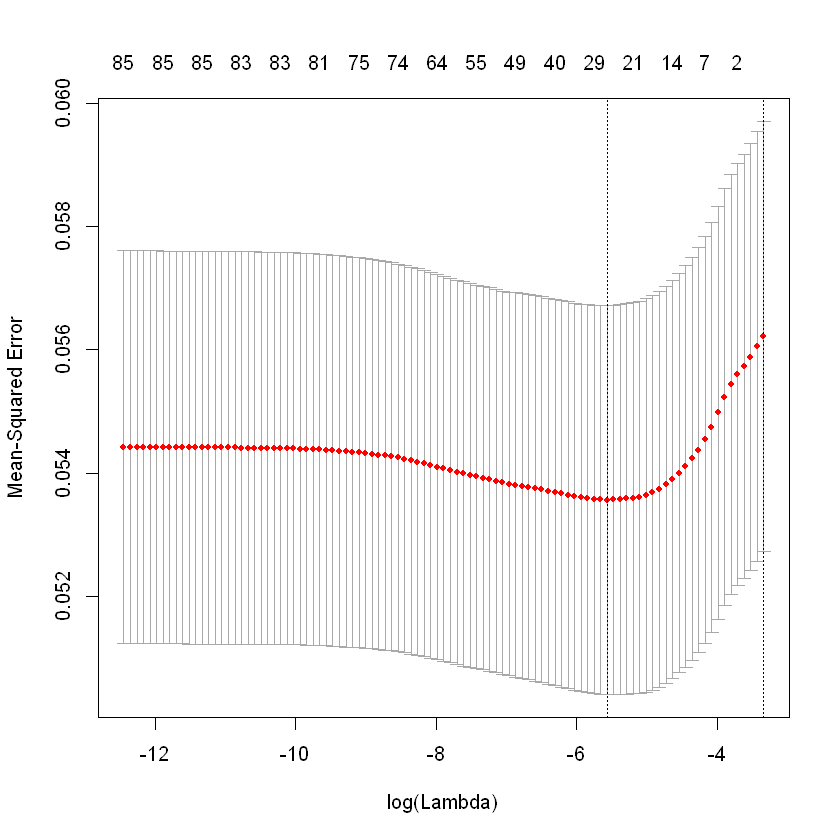

In [1145]:
plot(cv.lasso)

In [1146]:
bestlam <- cv.lasso$lambda.min
bestlam

[1] 0.003836101

refit lasso model using $\lambda$ chosen by cross-validation.

In [1147]:
fit.lasso <- glmnet(xmat,train_policy$caravan_policies, alpha = 1 )

alpha equals to 1 means lasso shrinkage is performed.

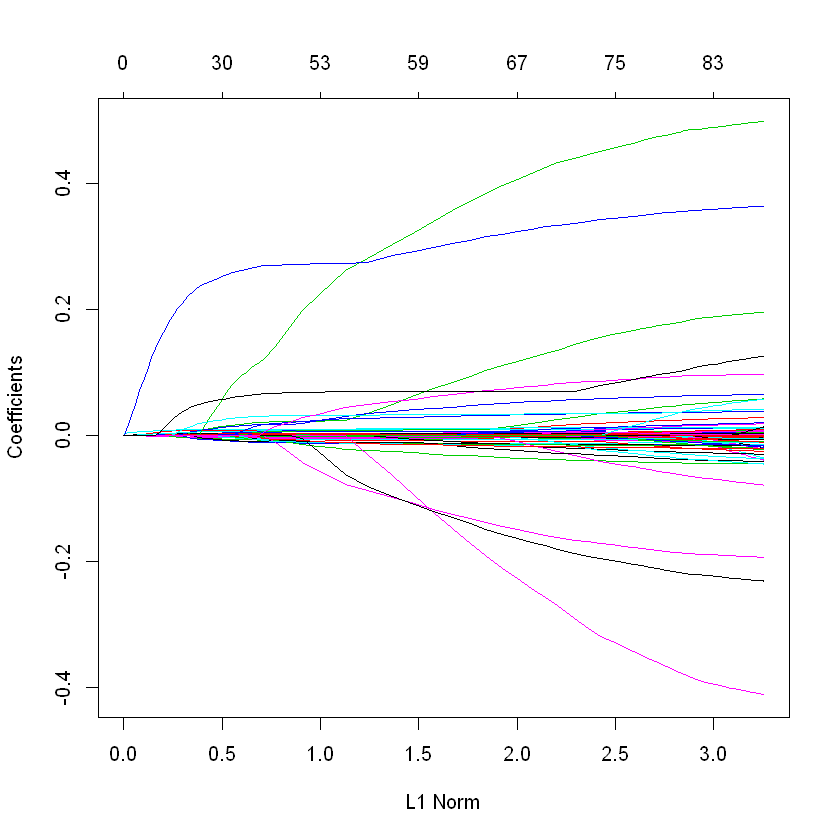

In [1148]:
plot(fit.lasso)

In [1149]:
predict(fit.lasso, s = bestlam, type = "coefficients")

86 x 1 sparse Matrix of class "dgCMatrix"
                                                            1
(Intercept)                                     -0.0291070029
cust_subtype                                     .           
number_of_houses                                 .           
avg_size_household                               .           
avg_age                                          0.0010628032
cust_main_type                                   .           
roman_catholic                                   .           
protestant                                       0.0008864568
other_religion                                   .           
no_religion                                     -0.0004105078
married                                          0.0022540713
living_together                                 -0.0009338962
other_relation                                   .           
singles                                          .           
household_without_children  

above summary shows that 56 of the 85 coefficient estimates are exactly zero. So the lasso model with $\lambda$ chosen by cross-validation contains only 29 variables, besides the intercept. 

The features selected by lasso are avg_age, roman_catholic, protestant, no_religion, married, living_together, 
high_level_education , lower_level_education, farmer, middle_management, rented_house, one_car, `income_75-122.000`
, `income_>123.000`, average_income, purchasing_power_class, private_third_party_insurance, third_party_insurance_agriculture
, car_policies, agricultural_machines_policies, family_accidents_insurance_policies, disability_insurance_policies
, fire_policies, number_of_car_policies, number_of_tractor_policies, number_of_surfboard_policies, number_of_boat_policies
, number_of_bicycle_policies, number_of_social_security_insurance_policies.

# Perform Ridge Shrinkage method

Ridge regression performs L2 regularization which adds penalty equivalent to square of the magnitude of coefficients.

In [1150]:
cv.ridge <- cv.glmnet(xmat, train_policy$caravan_policies, alpha = 0)

plot the MSE as a function of the logarithm of $\lambda$ with error bars

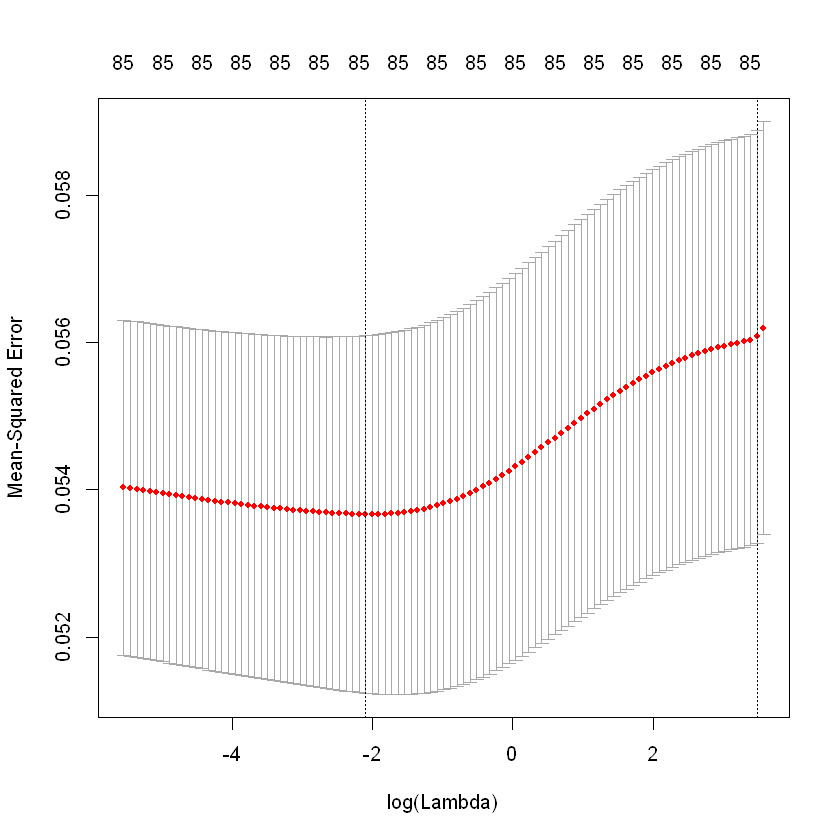

In [1151]:
plot(cv.ridge)

In [1152]:
bestlam1 <- cv.ridge$lambda.min
bestlam1

[1] 0.1227271

In [1153]:
fit.ridge <- glmnet(xmat,train_policy$caravan_policies, alpha = 0 )

alpha equals to 0 means lasso shrinkage is performed.

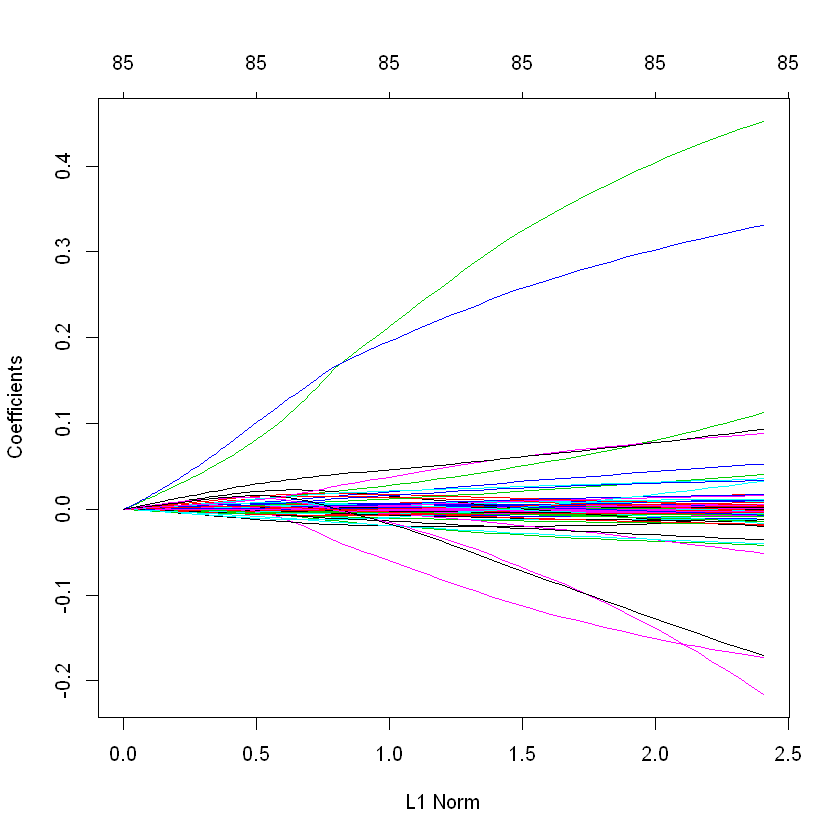

In [1154]:
plot(fit.ridge)

In [1155]:
predict(fit.ridge, s = bestlam1, type = "coefficients")

86 x 1 sparse Matrix of class "dgCMatrix"
                                                            1
(Intercept)                                     -2.904326e-02
cust_subtype                                    -3.542725e-05
number_of_houses                                -4.315390e-03
avg_size_household                              -6.638731e-04
avg_age                                          4.788170e-03
cust_main_type                                  -4.729045e-04
roman_catholic                                  -2.384137e-03
protestant                                       1.293552e-03
other_religion                                   1.681938e-03
no_religion                                     -1.208811e-03
married                                          1.441364e-03
living_together                                 -2.542446e-03
other_relation                                  -4.250392e-04
singles                                         -4.908708e-04
household_without_children  

Ridge regularizes the coefficient in way that it shrunk nearly to zero but not zero.

The lower MSE is obtained by lasso as compared to ridge and other feature selection algorithm thus its features form a better fit model

# Calculating Score for different model to find best model for caravan insurance policy

Renaming test data frame

In [1156]:
colnames(test_policy)[colnames(test_policy)=="V1"] <- "cust_subtype"
colnames(test_policy)[colnames(test_policy)=="V2"] <- "number_of_houses"
colnames(test_policy)[colnames(test_policy)=="V3"] <- "avg_size_household"
colnames(test_policy)[colnames(test_policy)=="V4"] <- "avg_age"
colnames(test_policy)[colnames(test_policy)=="V5"] <- "cust_main_type"
colnames(test_policy)[colnames(test_policy)=="V6"] <- "roman_catholic"
colnames(test_policy)[colnames(test_policy)=="V7"] <- "protestant"
colnames(test_policy)[colnames(test_policy)=="V8"] <- "other_religion"
colnames(test_policy)[colnames(test_policy)=="V9"] <- "no_religion"
colnames(test_policy)[colnames(test_policy)=="V10"] <- "married"
colnames(test_policy)[colnames(test_policy)=="V11"] <- "living_together"
colnames(test_policy)[colnames(test_policy)=="V12"] <- "other_relation"
colnames(test_policy)[colnames(test_policy)=="V13"] <- "singles"
colnames(test_policy)[colnames(test_policy)=="V14"] <- "household_without_children"
colnames(test_policy)[colnames(test_policy)=="V15"] <- "household_with_children"
colnames(test_policy)[colnames(test_policy)=="V16"] <- "high_level_education"
colnames(test_policy)[colnames(test_policy)=="V17"] <- "medium_level_education"
colnames(test_policy)[colnames(test_policy)=="V18"] <- "lower_level_education"
colnames(test_policy)[colnames(test_policy)=="V19"] <- "high_status"
colnames(test_policy)[colnames(test_policy)=="V20"] <- "entrepreneur"
colnames(test_policy)[colnames(test_policy)=="V21"] <- "farmer"
colnames(test_policy)[colnames(test_policy)=="V22"] <- "middle_management"
colnames(test_policy)[colnames(test_policy)=="V23"] <- "skilled_labourers"
colnames(test_policy)[colnames(test_policy)=="V24"] <- "unskilled labourers"
colnames(test_policy)[colnames(test_policy)=="V25"] <- "social_class_A"
colnames(test_policy)[colnames(test_policy)=="V26"] <- "social_class_B1"
colnames(test_policy)[colnames(test_policy)=="V27"] <- "social_class_B2"
colnames(test_policy)[colnames(test_policy)=="V28"] <- "social_class_C"
colnames(test_policy)[colnames(test_policy)=="V29"] <- "social_class_D"
colnames(test_policy)[colnames(test_policy)=="V30"] <- "rented_house"
colnames(test_policy)[colnames(test_policy)=="V31"] <- "home_owners"
colnames(test_policy)[colnames(test_policy)=="V32"] <- "one_car"
colnames(test_policy)[colnames(test_policy)=="V33"] <- "two_car"
colnames(test_policy)[colnames(test_policy)=="V34"] <- "no_car"
colnames(test_policy)[colnames(test_policy)=="V35"] <- "national_health_service"
colnames(test_policy)[colnames(test_policy)=="V36"] <- "private_health_insurance"
colnames(test_policy)[colnames(test_policy)=="V37"] <- "income_<_30.000"
colnames(test_policy)[colnames(test_policy)=="V38"] <- "income_30-45.000"
colnames(test_policy)[colnames(test_policy)=="V39"] <- "income_45-75.000"
colnames(test_policy)[colnames(test_policy)=="V40"] <- "income_75-122.000"
colnames(test_policy)[colnames(test_policy)=="V41"] <- "income_>123.000"
colnames(test_policy)[colnames(test_policy)=="V42"] <- "average_income"
colnames(test_policy)[colnames(test_policy)=="V43"] <- "purchasing_power_class"
colnames(test_policy)[colnames(test_policy)=="V44"] <- "private_third_party_insurance"
colnames(test_policy)[colnames(test_policy)=="V45"] <- "third_party_insurance_firms"
colnames(test_policy)[colnames(test_policy)=="V46"] <- "third_party_insurance_agriculture"
colnames(test_policy)[colnames(test_policy)=="V47"] <- "car_policies"
colnames(test_policy)[colnames(test_policy)=="V48"] <- "delivery_van_policies"
colnames(test_policy)[colnames(test_policy)=="V49"] <- "motorcycle_scooter_policies"
colnames(test_policy)[colnames(test_policy)=="V50"] <- "lorry_policies"
colnames(test_policy)[colnames(test_policy)=="V51"] <- "trailer_policies"
colnames(test_policy)[colnames(test_policy)=="V52"] <- "tractor_policies"
colnames(test_policy)[colnames(test_policy)=="V53"] <- "agricultural_machines_policies"
colnames(test_policy)[colnames(test_policy)=="V54"] <- "moped_policies"
colnames(test_policy)[colnames(test_policy)=="V55"] <- "life_insurances"
colnames(test_policy)[colnames(test_policy)=="V56"] <- "private_accident_insurance_policies"
colnames(test_policy)[colnames(test_policy)=="V57"] <- "family_accidents_insurance_policies"
colnames(test_policy)[colnames(test_policy)=="V58"] <- "disability_insurance_policies"
colnames(test_policy)[colnames(test_policy)=="V59"] <- "fire_policies"
colnames(test_policy)[colnames(test_policy)=="V60"] <- "surfboard_policies"
colnames(test_policy)[colnames(test_policy)=="V61"] <- "boat_policies"
colnames(test_policy)[colnames(test_policy)=="V62"] <- "bicycle_policies"
colnames(test_policy)[colnames(test_policy)=="V63"] <- "property_insurance_policies"
colnames(test_policy)[colnames(test_policy)=="V64"] <- "social_security_insurance_policies"
colnames(test_policy)[colnames(test_policy)=="V65"] <- "number_of_private_third_party_insurance"
colnames(test_policy)[colnames(test_policy)=="V66"] <- "number_of_third_party_insurance_firms"
colnames(test_policy)[colnames(test_policy)=="V67"] <- "number_of_third party insurane_agriculture"
colnames(test_policy)[colnames(test_policy)=="V68"] <- "number_of_car_policies"
colnames(test_policy)[colnames(test_policy)=="V69"] <- "number_of_delivery_van_policies"
colnames(test_policy)[colnames(test_policy)=="V70"] <- "number_of_motorcycle_scooter_policies"
colnames(test_policy)[colnames(test_policy)=="V71"] <- "number_of_lorry_policies"
colnames(test_policy)[colnames(test_policy)=="V72"] <- "number_of_trailer_policies"
colnames(test_policy)[colnames(test_policy)=="V73"] <- "number_of_tractor_policies"
colnames(test_policy)[colnames(test_policy)=="V74"] <- "number_of_agricultural_machines_policies"
colnames(test_policy)[colnames(test_policy)=="V75"] <- "number_of_moped_policies"
colnames(test_policy)[colnames(test_policy)=="V76"] <- "number_of_life_insurances"
colnames(test_policy)[colnames(test_policy)=="V77"] <- "number_of_private_accident_insurance_policies"
colnames(test_policy)[colnames(test_policy)=="V78"] <- "number_of_family accidents insurance_policies"
colnames(test_policy)[colnames(test_policy)=="V79"] <- "number_of_disability_insurance_policies"
colnames(test_policy)[colnames(test_policy)=="V80"] <- "number_of_fire_policies"
colnames(test_policy)[colnames(test_policy)=="V81"] <- "number_of_surfboard_policies"
colnames(test_policy)[colnames(test_policy)=="V82"] <- "number_of_boat_policies"
colnames(test_policy)[colnames(test_policy)=="V83"] <- "number_of_bicycle_policies"
colnames(test_policy)[colnames(test_policy)=="V84"] <- "number_of_property_insurance_policies"
colnames(test_policy)[colnames(test_policy)=="V85"] <- "number_of_social_security_insurance_policies"


Creating test_policy_f data frame from test data to test the predicted models for forward selection.

In [1157]:
test_policy_f <- data.frame(test_policy$married, test_policy$lower_level_education, test_policy$purchasing_power_class,
                            test_policy$private_third_party_insurance,test_policy$car_policies, test_policy$fire_policies, 
                            test_policy$number_of_boat_policies, test_policy$number_of_social_security_insurance_policies)
 
names(test_policy_f) <- c("married","lower_level_education","purchasing_power_class","private_third_party_insurance","car_policies","fire_policies","number_of_boat_policies","number_of_social_security_insurance_policies")
test_policy_f

# Reference7

married,lower_level_education,purchasing_power_class,private_third_party_insurance,car_policies,fire_policies,number_of_boat_policies,number_of_social_security_insurance_policies
5,6,3,1,0,4,0,0
5,0,8,2,6,4,0,0
5,4,5,2,6,4,0,0
5,4,4,2,5,3,0,0
9,9,1,2,0,1,0,0
5,6,2,0,0,4,0,0
8,4,5,2,6,2,0,0
9,2,8,2,0,0,0,0
9,2,6,2,0,2,0,0
9,5,8,2,0,4,0,1


Creating test_policy_f data frame from test data to test the predicted models for lasso shrinkage.

In [1158]:
test_policy_fl <- data.frame(test_policy$avg_age,test_policy$roman_catholic,test_policy$protestant,test_policy$no_religion, 
                             test_policy$married, test_policy$living_together,test_policy$high_level_education, 
                             test_policy$lower_level_education, test_policy$farmer, test_policy$middle_management, 
                             test_policy$rented_house, test_policy$one_car, test_policy$`income_75-122.000`, 
                             test_policy$`income_>123.000`, test_policy$average_income, test_policy$purchasing_power_class,
                             test_policy$private_third_party_insurance, test_policy$third_party_insurance_agriculture, 
                             test_policy$car_policies, test_policy$agricultural_machines_policies, 
                             test_policy$family_accidents_insurance_policies, test_policy$disability_insurance_policies, 
                             test_policy$fire_policies, test_policy$number_of_car_policies, 
                             test_policy$number_of_tractor_policies,test_policy$number_of_surfboard_policies, 
                             test_policy$number_of_boat_policies, test_policy$number_of_bicycle_policies, 
                             test_policy$number_of_social_security_insurance_policies)
 
names(test_policy_fl) <- c("avg_age","roman_catholic","protestant","no_religion","married","living_together",
                           "high_level_education","lower_level_education","farmer","middle_management",
                             "rented_house","one_car","income_75-122.000", 
                             "income_>123.000","average_income","purchasing_power_class",
                             "private_third_party_insurance","third_party_insurance_agriculture", 
                             "car_policies","agricultural_machines_policies",
                             "family_accidents_insurance_policies","disability_insurance_policies", 
                             "fire_policies","number_of_car_policies",
                             "number_of_tractor_policies","number_of_surfboard_policies", 
                             "number_of_boat_policies","number_of_bicycle_policies", 
                             "number_of_social_security_insurance_policies")
#test_policy_fl

# Predicting logistic model and finding the probabilities

In [1159]:
log_prob <- predict(logistic_model_f, new = test_policy_f, type = "response")
log_prob

1           2           3           4           5           6 
0.018495768 0.207990212 0.115288622 0.079629089 0.016084686 0.014063105 
          7           8           9          10          11          12 
0.131626854 0.055096981 0.056945035 0.099875845 0.013126144 0.156869366 
         13          14          15          16          17          18 
0.029673685 0.069620564 0.010294531 0.009585128 0.025777287 0.157299090 
         19          20          21          22          23          24 
0.013897035 0.028424619 0.055690236 0.126573802 0.038249442 0.108004178 
         25          26          27          28          29          30 
0.017959311 0.013472799 0.100378349 0.074973538 0.024351069 0.174229348 
         31          32          33          34          35          36 
0.019985998 0.101173183 0.070061507 0.012566740 0.022916071 0.068763774 
         37          38          39          40          41          42 
0.025998253 0.009210890 0.146065567 0.111003904 0.101951623 0.008719521 
         43          44          45          46          47          48 
0.104454875 0.155085140 0.088494885 0.039191407 0.012725609 0.052193742 
         49          50          51          52          53          54 
0.012812770 0.062283066 0.038027712 0.107547325 0.099762902 0.049030671 
         55          56          57          58          59          60 
0.051642501 0.017912540 0.202856333 0.027133017 0.013808948 0.019555046 
         61          62          63          64          65          66 
0.020602237 0.032892478 0.043476353 0.065773069 0.073122612 0.024624206 
         67          68          69          70          71          72 
0.036090896 0.028866442 0.111219900 0.014472912 0.043258657 0.053906683 
         73          74          75          76          77          78 
0.057102674 0.025527207 0.011122781 0.011568030 0.072654683 0.073316704 
         79          80          81          82          83          84 
0.040561501 0.053656406 0.036836319 0.225678261 0.049989168 0.071321203 
         85          86          87          88          89          90 
0.141609892 0.009909385 0.048652866 0.037642766 0.346876988 0.048921062 
         91          92          93          94          95          96 
0.016559516 0.200816064 0.017981319 0.052010772 0.012240373 0.017247352 
         97          98          99         100         101         102 
0.030041147 0.019016019 0.024118837 0.025658246 0.110864418 0.059292748 
        103         104         105         106         107         108 
0.198053616 0.027614589 0.101763896 0.030505419 0.026985599 0.083158449 
        109         110         111         112         113         114 
0.026098750 0.021792902 0.046528736 0.207263251 0.098662881 0.236157457 
        115         116         117         118         119         120 
0.028597402 0.164979784 0.014826280 0.024894619 0.019767823 0.031487043 
        121         122         123         124         125         126 
0.027055739 0.014010788 0.092729881 0.015261137 0.037836362 0.026167375 
        127         128         129         130         131         132 
0.051662468 0.046923163 0.037050970 0.109682403 0.046908677 0.035092496 
        133         134         135         136         137         138 
0.081835245 0.020843220 0.012447257 0.025798605 0.020219922 0.034433288 
        139         140         141         142         143         144 
0.048863836 0.018857527 0.196280907 0.016118620 0.018390214 0.078478979 
        145         146         147         148         149         150 
0.175253827 0.043300410 0.014129131 0.028368977 0.148837798 0.011832844 
        151         152         153         154         155         156 
0.166388462 0.024628045 0.124657800 0.048652866 0.060924165 0.015856141 
        157         158         159         160         161         162 
0.013500514 0.027281219 0.018857527 0.018004103 0.004365035 0.078074977 
        163         164         165         166         167         

appending probabilities with test dataframe test_policy_f

In [1160]:
log_output <- cbind(test_policy_f, log_prob)
log_output

# Reference8

married,lower_level_education,purchasing_power_class,private_third_party_insurance,car_policies,fire_policies,number_of_boat_policies,number_of_social_security_insurance_policies,log_prob
5,6,3,1,0,4,0,0,0.018495768
5,0,8,2,6,4,0,0,0.207990212
5,4,5,2,6,4,0,0,0.115288622
5,4,4,2,5,3,0,0,0.079629089
9,9,1,2,0,1,0,0,0.016084686
5,6,2,0,0,4,0,0,0.014063105
8,4,5,2,6,2,0,0,0.131626854
9,2,8,2,0,0,0,0,0.055096981
9,2,6,2,0,2,0,0,0.056945035
9,5,8,2,0,4,0,1,0.099875845


Appending evaluation data from test target text file.

In [1161]:
log_final <- cbind(log_output,Eval_policy)
log_final

married,lower_level_education,purchasing_power_class,private_third_party_insurance,car_policies,fire_policies,number_of_boat_policies,number_of_social_security_insurance_policies,log_prob,V1
5,6,3,1,0,4,0,0,0.018495768,0
5,0,8,2,6,4,0,0,0.207990212,1
5,4,5,2,6,4,0,0,0.115288622,0
5,4,4,2,5,3,0,0,0.079629089,0
9,9,1,2,0,1,0,0,0.016084686,0
5,6,2,0,0,4,0,0,0.014063105,0
8,4,5,2,6,2,0,0,0.131626854,0
9,2,8,2,0,0,0,0,0.055096981,0
9,2,6,2,0,2,0,0,0.056945035,0
9,5,8,2,0,4,0,1,0.099875845,0


Sorting the data frame into descending order to sort for customers from highest to lowest probabilities of buying caravan insurance 

In [1162]:
log_final_sorted <- final[with(log_final, order(-log_prob)), ]
log_final_sorted

# Reference9 

,married,lower_level_education,purchasing_power_class,private_third_party_insurance,car_policies,fire_policies,number_of_boat_policies,number_of_social_security_insurance_policies,prob,V1
576,7,2,7,0,6,5,2,0,0.9154805,1
3139,4,5,3,1,6,4,2,1,0.8833988,0
2863,5,5,5,2,6,4,2,0,0.8732584,0
1996,7,1,6,2,6,4,1,0,0.6590156,0
2622,5,1,7,2,6,4,1,0,0.6240771,1
292,9,9,3,2,6,4,1,0,0.4365264,0
3500,9,2,3,0,6,0,1,0,0.4344909,1
1930,9,0,8,2,6,4,0,1,0.4279465,0
3773,9,0,8,2,6,4,0,1,0.4279465,0
948,7,0,7,2,6,4,0,1,0.3520835,1


Considering only 800 most likely predicted customers to buy caravan insurance policy.

In [1163]:
log_score <- log_final_sorted[1:800,]
log_score

,married,lower_level_education,purchasing_power_class,private_third_party_insurance,car_policies,fire_policies,number_of_boat_policies,number_of_social_security_insurance_policies,prob,V1
576,7,2,7,0,6,5,2,0,0.9154805,1
3139,4,5,3,1,6,4,2,1,0.8833988,0
2863,5,5,5,2,6,4,2,0,0.8732584,0
1996,7,1,6,2,6,4,1,0,0.6590156,0
2622,5,1,7,2,6,4,1,0,0.6240771,1
292,9,9,3,2,6,4,1,0,0.4365264,0
3500,9,2,3,0,6,0,1,0,0.4344909,1
1930,9,0,8,2,6,4,0,1,0.4279465,0
3773,9,0,8,2,6,4,0,1,0.4279465,0
948,7,0,7,2,6,4,0,1,0.3520835,1


Calculating the score or hit rate for logistic model

In [1164]:
(sum(log_score$V1==1)/800)*100

[1] 13.625

The score or hit rate of 13.625% shows the percentage of customer predicted by Logistic model with forward stepwise feature selection method that are more likely to purchase caravan policy.

Calculating Accuracy for logistic model

In [1165]:
table(log_final$V1, ifelse(log_prob > 0.5, "1", "0")) # confusion matrix for logrithmic model
mean(ifelse(log_prob > 0.5, "1", "0") == log_final$V1) # Accuracy rate
mean(ifelse(log_prob > 0.5, "1", "0") != log_final$V1) # Error rate

# Reference10

   
       0    1
  0 3759    3
  1  236    2

[1] 0.94025

[1] 0.05975

Accuracy for logistic model is 94%, and error is 6%

# Perform Linear Discriminant Analysis(LDA)

Sometimes when we have binomial response variable with value (1 or 0) which are well sepearated, sometime it might happens that logistic resgression model results in unstability. 

The number of rows(n) in our dataset is very large as compared to number of predictors(p). LDA works more stable.


* Reference10

# Perform LDA with forward stepwise feature selection

In [1166]:
lda_model = lda(caravan_policies ~ married+lower_level_education+purchasing_power_class+private_third_party_insurance+
                car_policies+fire_policies+number_of_boat_policies+number_of_social_security_insurance_policies,
                data = train_policy)
#lda_model

The above summary shows that 6% of customers are more likely to purchase caravan insurance policy while 94% will not.

Next, it provides group mean, its the average of each predictors in the model.

Coefficient of linear discriminants provides linear combinations of all the predictors.

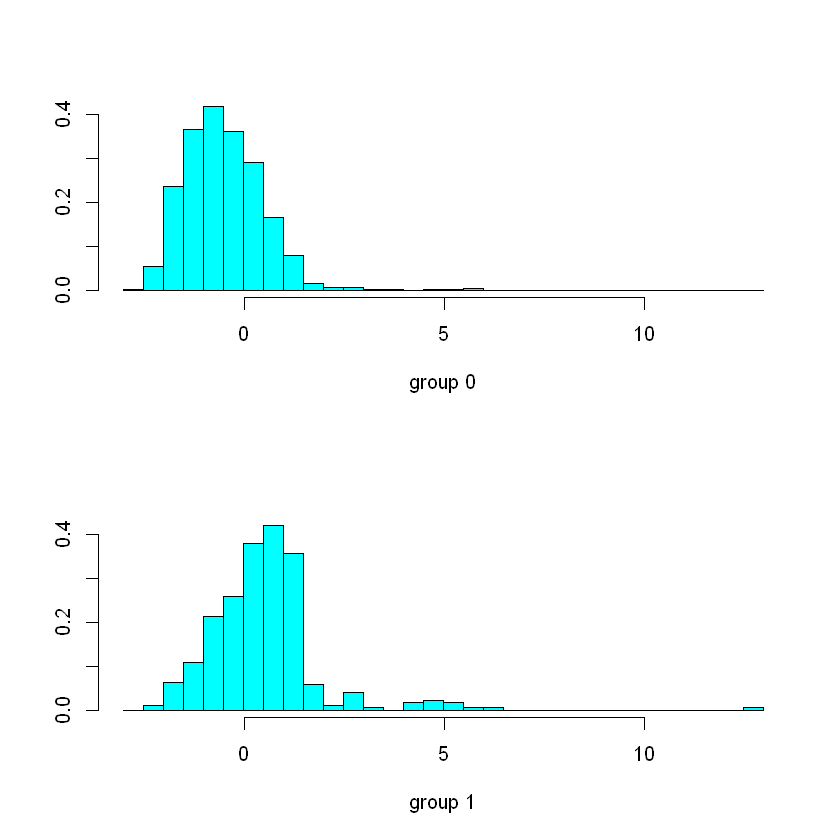

In [1167]:
plot(lda_model)

Predicting LDA probabilities.

In [1168]:
prob_lda <- predict(lda_model, newdata = test_policy_f)
#prob_lda

The above output have 3 list itmes:
Class predicting who will most likely to purchase caravan policy.
Posterior matrix consisting of probability of who will buy or not buy caravan policy.
$x shows linear discriminant values.

In [1169]:
prob.posterior <- as.data.frame(prob_lda$posterior)
#prob.posterior

Combining probability calculated in lda probabilities with test data

In [1170]:
lda_output <- cbind(test_policy_f, prob.posterior)
#lda_output

# Reference11

Merging evaluation data with test dataset

In [1171]:
lda_final <- cbind(lda_output,Eval_policy)
#lda_final

Renaming the probability column

In [1172]:
colnames(lda_final)[colnames(lda_final)=="1"] <- "ldaprob"

In [1173]:
lda_final

married,lower_level_education,purchasing_power_class,private_third_party_insurance,car_policies,fire_policies,number_of_boat_policies,number_of_social_security_insurance_policies,0,ldaprob,V1
5,6,3,1,0,4,0,0,0.9814119,0.018588085,0
5,0,8,2,6,4,0,0,0.7986145,0.201385499,1
5,4,5,2,6,4,0,0,0.8930654,0.106934623,0
5,4,4,2,5,3,0,0,0.9256727,0.074327255,0
9,9,1,2,0,1,0,0,0.9846945,0.015305499,0
5,6,2,0,0,4,0,0,0.9865178,0.013482247,0
8,4,5,2,6,2,0,0,0.8826677,0.117332307,0
9,2,8,2,0,0,0,0,0.9433899,0.056610126,0
9,2,6,2,0,2,0,0,0.9411760,0.058824019,0
9,5,8,2,0,4,0,1,0.7706053,0.229394657,0


Sorting the dataframe in descending order of probability

In [1174]:
lda_final_sorted <- lda_final[with(lda_final, order(-ldaprob)), ]
lda_final_sorted
#Reference12

,married,lower_level_education,purchasing_power_class,private_third_party_insurance,car_policies,fire_policies,number_of_boat_policies,number_of_social_security_insurance_policies,0,ldaprob,V1
3139,4,5,3,1,6,4,2,1,7.727757e-05,0.9999227,0
576,7,2,7,0,6,5,2,0,1.402293e-04,0.9998598,1
2863,5,5,5,2,6,4,2,0,2.075729e-04,0.9997924,0
1996,7,1,6,2,6,4,1,0,1.982446e-02,0.9801755,0
2622,5,1,7,2,6,4,1,0,2.244762e-02,0.9775524,1
292,9,9,3,2,6,4,1,0,5.216108e-02,0.9478389,0
3500,9,2,3,0,6,0,1,0,5.659220e-02,0.9434078,1
3504,5,4,3,0,6,3,1,0,7.766953e-02,0.9223305,0
790,4,5,2,0,6,2,1,0,1.144379e-01,0.8855621,0
3670,3,6,1,2,6,0,1,0,1.214237e-01,0.8785763,0


Selecting the 800 top probabilities of the customers who are most likely  purchase caravan policy.

In [1175]:
lda_score <- lda_final_sorted[1:800,]
#lda_score

Finally calculating the score or hit rate that provide percentage of customer predicted by LDA model that are more likely to buy caravan policy.

In [1176]:
(sum(lda_score$V1==1)/800)*100

[1] 14

The score or hit rate of 14.00% shows the percentage of customer predicted by LDA model with forward stepwise feature selection method that are more likely to purchase caravan policy.

LDA is much flexible classifier as compared to QDA and lower variance which results in improved prediction performance. But sometime it suffers from higher bias. QDA provide more accurate non-linear classification decision boundaries.

Calculating Accuracy for LDA

In [1177]:
table(lda_final_sorted$V1, ifelse(lda_final_sorted$ldaprob > 0.5, "1", "0"))

mean(ifelse(lda_final_sorted$ldaprob > 0.5, "1", "0") == lda_final_sorted$V1)

mean(ifelse(lda_final_sorted$ldaprob > 0.5, "1", "0") != lda_final_sorted$V1)

   
       0    1
  0 3747   15
  1  233    5

[1] 0.938

[1] 0.062

The accuracy for LDA is 93% and error is 7%

# Perform QDA with forward stepwise feature selection 

In [1178]:
library(MASS)
qda_model = qda(caravan_policies ~ married+lower_level_education+purchasing_power_class+private_third_party_insurance+
                        car_policies+fire_policies+number_of_boat_policies+number_of_social_security_insurance_policies, data = train_policy)
qda_model

Call:
qda(caravan_policies ~ married + lower_level_education + purchasing_power_class + 
    private_third_party_insurance + car_policies + fire_policies + 
    number_of_boat_policies + number_of_social_security_insurance_policies, 
    data = train_policy)

Prior probabilities of groups:
         0          1 
0.94022673 0.05977327 

Group means:
   married lower_level_education purchasing_power_class
0 6.149616              4.624954               4.187797
1 6.715517              3.747126               5.000000
  private_third_party_insurance car_policies fire_policies
0                     0.7478992     2.859335      1.782974
1                     1.1379310     4.718391      2.531609
  number_of_boat_policies number_of_social_security_insurance_policies
0             0.003836317                                   0.01223968
1             0.040229885                                   0.04597701

The above summary shows that 6% of customers are more likely to purchase caravan insurance policy while 94% will not.

Next, it provides group mean, its the average of each predictors in the model.

There is no Coefficient of linear discriminant as compared to LDA.

Predicting qda on test data

In [1179]:
prob_qda <- predict(qda_model, newdata = test_policy_f)
#prob_qda

The above output have 3 list itmes:
Class predicting who will most likely to purchase caravan policy and doesnot return linear discriminat values.
Posterior matrix consisting of probability of who will buy or not buy caravan policy.
$x shows linear discriminant values.

In [1180]:
prob.posterior_q <- as.data.frame(prob_qda$posterior)
# prob.posterior_q

Combining probability calculated in qda probabilities with test data

In [1181]:
qda_output <- cbind(test_policy_f, prob.posterior_q)
#qda_output

Merging evaluation data with test dataset

In [1182]:
qda_final <- cbind(qda_output,Eval_policy)
#qda_final

Renaming the probability column

In [1183]:
colnames(qda_final)[colnames(qda_final)=="1"] <- "qdaprob"

Sorting the dataframe in descending order of probability

In [1184]:
qda_final_sorted <- qda_final[with(qda_final, order(-qdaprob)), ]
#qda_final_sorted

Selecting the 800 top probabilities of the customers who are most likely  purchase caravan policy.

In [1185]:
qda_score <- qda_final_sorted[1:800,]
#qda_score

In [1186]:
(sum(qda_score$V1==1)/800)*100

[1] 12.875

The score or hit rate of 12.875% shows the percentage of customer predicted by QDA model with forward stepwise feature selection method that are more likely to purchase caravan policy.

Calculating accuracy for QDA

In [1187]:
table(qda_final_sorted$V1, ifelse(qda_final_sorted$qdaprob > 0.5, "1", "0"))

mean(ifelse(qda_final_sorted$qdaprob > 0.5, "1", "0") == qda_final_sorted$V1)

mean(ifelse(qda_final_sorted$qdaprob > 0.5, "1", "0") != qda_final_sorted$V1)

   
       0    1
  0 3707   55
  1  229    9

[1] 0.929

[1] 0.071

For QDA accuracy is 93% and error is 7%

# Perform LDA with lasso shrinkage method

In [1188]:
lda_model_lasso = lda(caravan_policies ~ avg_age+ roman_catholic+ protestant+ no_religion+ married+ living_together+ 
                    high_level_education + lower_level_education+ farmer+ middle_management+ rented_house+ one_car+
                    `income_75-122.000`+ `income_>123.000`+ average_income+ purchasing_power_class+ 
                    private_third_party_insurance+ third_party_insurance_agriculture + car_policies+ 
                    agricultural_machines_policies+ family_accidents_insurance_policies+ disability_insurance_policies+
                    fire_policies+ number_of_car_policies+ number_of_tractor_policies+ number_of_surfboard_policies+ 
                      number_of_boat_policies + number_of_bicycle_policies+ number_of_social_security_insurance_policies,
                data = train_policy)
lda_model_lasso

Call:
lda(caravan_policies ~ avg_age + roman_catholic + protestant + 
    no_religion + married + living_together + high_level_education + 
    lower_level_education + farmer + middle_management + rented_house + 
    one_car + `income_75-122.000` + `income_>123.000` + average_income + 
    purchasing_power_class + private_third_party_insurance + 
    third_party_insurance_agriculture + car_policies + agricultural_machines_policies + 
    family_accidents_insurance_policies + disability_insurance_policies + 
    fire_policies + number_of_car_policies + number_of_tractor_policies + 
    number_of_surfboard_policies + number_of_boat_policies + 
    number_of_bicycle_policies + number_of_social_security_insurance_policies, 
    data = train_policy)

Prior probabilities of groups:
         0          1 
0.94022673 0.05977327 

Group means:
   avg_age roman_catholic protestant no_religion  married living_together
0 2.990318      0.6949214   4.612715    3.275301 6.149616       0.8916697
1 3.0

The above summary shows that 6% of customers are more likely to purchase caravan insurance policy while 94% will not.

Next, it provides group mean, its the average of each predictors in the model.

Coefficient of linear discriminants provides linear combinations of all the predictors.

Predicting LDA probabilities.

In [1189]:
#test_policy_fl

In [1190]:
prob_lda_lasso <- predict(lda_model_lasso, newdata = test_policy_fl)
prob_lda_lasso

,0,1
1,0.9773473,0.022652684
2,0.7199969,0.280003117
3,0.8978029,0.102197110
4,0.9344100,0.065590033
5,0.9877770,0.012222951
6,0.9819444,0.018055620
7,0.9121972,0.087802841
8,0.9721001,0.027899877
9,0.9341283,0.065871709
10,0.7963293,0.203670650


The above output have 3 list itmes:
Class predicting who will most likely to purchase caravan policy.
Posterior matrix consisting of probability of who will buy or not buy caravan policy.
$x shows linear discriminant values.

In [1191]:
prob_lasso.posterior <- as.data.frame(prob_lda_lasso$posterior)
#prob_lasso.posterior

Combining probability calculated in lda probabilities with test data

In [1192]:
lda_output_lasso <- cbind(test_policy_f, prob_lasso.posterior)
#lda_output_lasso

Merging evaluation data with test dataset

In [1193]:
lda_final_lasso <- cbind(lda_output_lasso,Eval_policy)
lda_final_lasso

married,lower_level_education,purchasing_power_class,private_third_party_insurance,car_policies,fire_policies,number_of_boat_policies,number_of_social_security_insurance_policies,0,1,V1
5,6,3,1,0,4,0,0,0.9773473,0.022652684,0
5,0,8,2,6,4,0,0,0.7199969,0.280003117,1
5,4,5,2,6,4,0,0,0.8978029,0.102197110,0
5,4,4,2,5,3,0,0,0.9344100,0.065590033,0
9,9,1,2,0,1,0,0,0.9877770,0.012222951,0
5,6,2,0,0,4,0,0,0.9819444,0.018055620,0
8,4,5,2,6,2,0,0,0.9121972,0.087802841,0
9,2,8,2,0,0,0,0,0.9721001,0.027899877,0
9,2,6,2,0,2,0,0,0.9341283,0.065871709,0
9,5,8,2,0,4,0,1,0.7963293,0.203670650,0


Renaming the probability column

In [1194]:
colnames(lda_final_lasso)[colnames(lda_final_lasso)=="1"] <- "ldaproblasso"


Sorting the dataframe in descending order of probability

In [1195]:
lda_final_sorted_lasso <- lda_final_lasso[with(lda_final_lasso, order(-ldaproblasso)), ]
#lda_final_sorted_lasso

Selecting the 800 top probabilities of the customers who are most likely purchase caravan policy.

In [1196]:
lda_score_lasso <- lda_final_sorted_lasso[1:800,]
#lda_score_lasso

Finally calculating the score or hit rate that provide percentage of customer predicted by LDA model that are more likely to buy caravan policy.

In [1197]:
(sum(lda_score_lasso$V1==1)/800)*100

[1] 14.375

The score or hit rate of 13.375% shows the percentage of customer predicted by QDA model with lasso shrinkage method that are more likely to purchase caravan policy.

Calculating Accuracy

In [1198]:
table(lda_final_sorted_lasso$V1, ifelse(lda_final_sorted_lasso$ldaproblasso > 0.5, "1", "0"))

mean(ifelse(lda_final_sorted_lasso$ldaproblasso > 0.5, "1", "0") == lda_final_sorted$V1)

mean(ifelse(lda_final_sorted_lasso$ldaproblasso > 0.5, "1", "0") != lda_final_sorted_lasso$V1)

   
       0    1
  0 3742   20
  1  231    7

[1] 0.93675

[1] 0.06275

The accuracy is 93.7% and error is 6.3%

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

I have used different methods for feature selection methods which gives different sets of variables like:-

BACKWARD stepwise feature selection method selects following features:
'married' ,'lower_level_education', 'farmer' ,'third_party_insurance_agriculture', 'car_policies', 'fire_policies' 'number_of_boat_policies', 'number_of_social_security_insurance_policies'


FORWARD stepwise feature selection method selects following features:
'married' ,'lower_level_education', 'farmer' ,'third_party_insurance_agriculture', 'car_policies', 'fire_policies' 'number_of_boat_policies' ,'number_of_social_security_insurance_policies'


LASSO shrinking method selects following features:
avg_age, roman_catholic, protestant, no_religion, married, living_together, 
high_level_education , lower_level_education, farmer, middle_management, rented_house, one_car, `income_75-122.000`
, `income_>123.000`, average_income, purchasing_power_class, private_third_party_insurance, third_party_insurance_agriculture
, car_policies, agricultural_machines_policies, family_accidents_insurance_policies, disability_insurance_policies
, fire_policies, number_of_car_policies, number_of_tractor_policies, number_of_surfboard_policies, number_of_boat_policies
, number_of_bicycle_policies, number_of_social_security_insurance_policies.

when stepwise subset selections were used to fit a model with logistic, LDA and QDA. The score was comperatively low as compared to lasso shrinkage method used for feature selection and LDA is fit with score of 14.375%. 


* It can be easily predicted that the two types of variables are playing key roles that are the number of and contribution of car policies as they are selected in all the feature selection methods. From the correlation matrix also we can find that features related to cars are most significant. The EDA also implies that those customers who have 1 car or if they have insurance of 1000-4999 are more likely to purchase caravan policy.

* Number of Fire policy variable shows those customers who have 4 policy are more likely to buy caravan policy.

* private third-party insurance significantly important as in EDA and correlation it shows high significance with the target variable.

* The policies related to different automobiles are significant helps in predicting potential customers like number_of_tractor_policies, number_of_surfboard_policies, number_of_boat_policies, number_of_bicycle_policies, agricultural_machines_policies, as these customers who are not purchasing these policies are highly interested in purchasing caravan policy.

* The variables with different income levels are more likely to purchase caravan policy, average income group ranging from 200−499 and income_75-122.000, income_>123.000 are significant variables.

* Age group also significant variable customer from age of 40-50 years are more likely to purchase caravan policy.

* Customers of different subtype like farmers are significant.

* Different education level(high_level_education, lower_level_education) also correlated to caravan variable significantly.

*  roman_catholic, protestant, no_religion, married, living_together middle_management, rented_house, purchasing_power_class, private_third_party_insurance, third_party_insurance_agriculture  family_accidents_insurance_policies, disability_insurance_policies , number_of_social_security_insurance_policies are the other features which were already infered from EDA and correlation matrix.


## 6. Conclusion <a class="anchor" id="sec_6"></a>

For the prediction of who will be interested in buying caravan policy, 3 models were compared Logistic, LDA and QDA. Different feature selection technique like stepwise backward/forward is used. With the use of forward stepwise feature selection logistic model is fit and the score of is calculated that is 13.625%, for LDA score is14 %, for QDA score is 12.875%. Another model with the lasso feature selection method, Lda model is fit and the score is 14.375%. It can be inferred that LDA with lasso feature selection having highest hit rate and a good accuracy of 93.7% performs best for the car insurance data set. Most correlated or significant features or predictors were selected in order to target those customers which are highly related to these variables. These predictors helps to understand why these customers will buy the caravan insurance policy.

## 7. References <a class="anchor" id="sec_7"></a>

* Reference1- http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software
* Reference2- http://rprogramming.net/rename-columns-in-r/
* Reference3- https://www.statmethods.net/graphs/bar.html
* Reference4 -https://www.statmethods.net/graphs/pie.html
* Reference5- https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/
* Reference6 -https://datascienceplus.com/perform-logistic-regression-in-r/
* Reference7 -https://dzone.com/articles/learn-r-how-create-data-frames
* Reference8 -https://discuss.analyticsvidhya.com/t/how-to-populate-predictions-in-test-data-after-training-the-model-on-train-set-in-r/2452/4
* Reference9 -https://www.tutorialkart.com/r-tutorial/sort-a-data-frame-by-column-in-ascending-and-descending-orders/
* Reference10 -http://uc-r.github.io/discriminant_analysis
* Reference11- https://discuss.analyticsvidhya.com/t/how-to-populate-predictions-in-test-data-after-training-the-model-on-train-set-in-r/2452/4
* Reference12 -https://www.tutorialkart.com/r-tutorial/sort-a-data-frame-by-column-in-ascending-and-descending-orders/